<div style="border-radius:10px; padding: 15px;  font-size:130%; text-align:center">

# Đồ án tốt nghiệp Data Science
# Topic: Customer Segmentation

# Phân cụm khách hàng áp dụng RFM và Clustering Algorithm

# Giới thiệu project

![Launching-Soon-MoEngages-Predictive-Segments-Using-RFM-Analysis.jpg](attachment:Launching-Soon-MoEngages-Predictive-Segments-Using-RFM-Analysis.jpg)

### Business Objective/Problem:

Cửa hàng X chuyên cung cấp các sản phẩm thiết yếu như rau, củ, quả, thịt, cá, trứng, sữa, và nước giải khát. Đối tượng khách hàng chủ yếu của cửa hàng là người tiêu dùng cá nhân. Chủ cửa hàng mong muốn tăng doanh số bán hàng, giới thiệu sản phẩm đến đúng đối tượng khách hàng, và nâng cao chất lượng dịch vụ để đạt được sự hài lòng tối đa từ khách hàng.
### Mục tiêu:

- Cải thiện hiệu quả quảng bá
- Tăng doanh thu bán hàng
- Cải thiện mức độ hài lòng của khách hàng

<div style="border-radius:10px; padding: 15px;  font-size:130%; text-align:left">

<h2 align="left">Các kiến thức/ kỹ năng cần để giải quyết vấn đề này:</h2>

- Hiểu vấn đề
- Import các thư viện cần thiết và hiểu cách sử dụng
- Đọc dữ liệu (dữ liệu project này được cung cấp)
- Thực hiện EDA cơ bản
- Tiền xử lý dữ liệu: làm sạch, tạo tính năng mới, lựa chọn tính năng cần thiết…
- Trực quan hóa dữ liệu
- Lựa chọn thuật toán cho bài toán phân cụm
- Xây dựng model
- Đánh giá model
- Báo cáo kết quả

# Data Science Process

<div style="border-radius:10px; padding: 15px;  font-size:130%; text-align:left">

<h2 align="left">Bước 1: Hiểu Biết Kinh Doanh:</h2>

### Xác định vấn đề:

- Tìm giải pháp giúp nâng cao hiệu quả quảng bá, từ đó tăng doanh thu và cải thiện mức độ hài lòng của khách hàng.

Mục tiêu: Xây dựng hệ thống phân cụm khách hàng dựa trên dữ liệu mà cửa hàng cung cấp. Hệ thống này sẽ giúp cửa hàng xác định các nhóm khách hàng khác nhau, từ đó phát triển các chiến lược kinh doanh và dịch vụ chăm sóc khách hàng phù hợp với từng nhóm đối tượng.

<div style="border-radius:10px; padding: 15px;  font-size:130%; text-align:left">

<h2 align="left">Bước 2: Data Understanding/Acquire</h2>
Mục tiêu: Xây dựng hệ thống phân cụm khách hàng dựa trên dữ liệu mà cửa hàng cung cấp. Hệ thống này sẽ giúp cửa hàng xác định các nhóm khách hàng khác nhau, từ đó phát triển các chiến lược kinh doanh và dịch vụ chăm sóc khách hàng phù hợp với từng nhóm đối tượng.

### Dữ liệu cần thiết: được cung cấp 2 tập dữ liệu

- Products_with_Prices.csv: Danh sách sản phẩm kèm theo giá (productId,	productName, price)
- Transactions.csv: Thông tin giao dịch của khách hàng (Member_number, Date, productId, items)

<div style="border-radius:10px; padding: 15px;  font-size:130%; text-align:left">

<h2 align="left">Bước 3: Data Preparation/Prepare</h2>

### Import thư viện cần thiết:

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
from datetime import datetime

from sklearn.preprocessing import StandardScaler as sdscale
from sklearn.cluster import KMeans as KM
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

import plotly.express as px
import squarify
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
%matplotlib inline

In [2]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
import pyspark.sql.functions as f
from pyspark.sql.functions import col
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator


### Đọc dữ liệu:

In [3]:
transactions = pd.read_csv('Transactions.csv')
products = pd.read_csv('Products_with_Prices.csv')

In [4]:
transactions

Member_number        Date  productId  items
0               1808  21-07-2015          1      3
1               2552  05-01-2015          2      1
2               2300  19-09-2015          3      3
3               1187  12-12-2015          4      3
4               3037  01-02-2015          2      1
...              ...         ...        ...    ...
38760           4471  08-10-2014         76      2
38761           2022  23-02-2014         65      3
38762           1097  16-04-2014        154      2
38763           1510  03-12-2014         12      3
38764           1521  26-12-2014        104      3

[38765 rows x 4 columns]

In [5]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Member_number  38765 non-null  int64 
 1   Date           38765 non-null  object
 2   productId      38765 non-null  int64 
 3   items          38765 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.2+ MB


In [6]:
products

productId            productName     price
0            1         tropical fruit  7.803532
1            2             whole milk  1.800000
2            3              pip fruit  3.000000
3            4       other vegetables  0.800000
4            5             rolls/buns  1.200000
..         ...                    ...       ...
162        163         pudding powder  4.900000
163        164            ready soups  3.900000
164        165        make up remover  3.400000
165        166         toilet cleaner  4.900000
166        167  preservation products  6.750000

[167 rows x 3 columns]

In [7]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   productId    167 non-null    int64  
 1   productName  167 non-null    object 
 2   price        167 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.0+ KB


### Thông tin dữ liệu:
 Bao gồm hai tập tin CSV chứa các thông tin về sản phẩm và giao dịch:
Tập tin Products_with_Prices.csv chứa thông tin về các sản phẩm mà cửa hàng bán
- productId: Mã định danh duy nhất cho từng sản phẩm.
- productName: Tên sản phẩm.
- price: Giá của từng sản phẩm (USD).

Tập tin Transactions.csv chứa thông tin chi tiết về các giao dịch của khách hàng:
- Member_number: Mã định danh duy nhất cho từng khách hàng.
- Date: Ngày giao dịch được thực hiện.
- productId: Mã định danh của sản phẩm được mua trong giao dịch.
- items: Số lượng sản phẩm được mua trong giao dịch.

### Quick EDA (Exploratory Data Analysis)

In [8]:
ProfileReport(transactions, title='Pandas Profiling Report', html={'style':{'full_width':True}})

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
ProfileReport(products, title='Pandas Profiling Report', html={'style':{'full_width':True}})

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Sơ lược EDA Dataset cho thấy:
- Cửa hàng hiện có 167 sản phẩm
- Hiện có 3898 khách hàng được lưu trữ
- Lưu trữ dữ liệu 728(2 năm) ngày từ 2014-01-01 đến 2015-12-30
- Không có dữ liệu thiếu
- có 237 (0.6%) dòng bị lặp ở transactions
- Không có sản phẩm bị lặp
- giá từ 0.3$ đến 28.5$, không có không hợp lý (dưới 0)
- Các sản phẩm bán số lượng từ 1-3

### Kiểm tra lại:

In [10]:
products['productId'].nunique()

167

In [11]:
transactions['Member_number'].nunique()

3898

In [12]:
display(transactions['Date'].min(), transactions['Date'].max(), transactions['Date'].nunique())

'01-01-2014'

'31-10-2015'

728

In [13]:
transactions.isnull().sum()

Member_number    0
Date             0
productId        0
items            0
dtype: int64

In [14]:
transactions.duplicated().sum()

244

In [15]:
display(len(products['productId']), products['productId'].nunique())

167

167

In [16]:
len(products[products['price']<0])

0

In [17]:
display(products['price'].min(),products['price'].max())

0.3

28.5

In [18]:
transactions['items'].unique()

array([3, 1, 2], dtype=int64)

## Tiền xử lý dữ liệu:

In [19]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Member_number  38765 non-null  int64 
 1   Date           38765 non-null  object
 2   productId      38765 non-null  int64 
 3   items          38765 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.2+ MB


In [20]:
transactions.head()

Member_number        Date  productId  items
0           1808  21-07-2015          1      3
1           2552  05-01-2015          2      1
2           2300  19-09-2015          3      3
3           1187  12-12-2015          4      3
4           3037  01-02-2015          2      1

In [21]:
transactions.tail()

Member_number        Date  productId  items
38760           4471  08-10-2014         76      2
38761           2022  23-02-2014         65      3
38762           1097  16-04-2014        154      2
38763           1510  03-12-2014         12      3
38764           1521  26-12-2014        104      3

In [22]:
print(f"Dataset Shape: {transactions.shape}")

Dataset Shape: (38765, 4)


Chuyển datatype của Member_number sang str, Date sang datetime

In [23]:
transactions['Member_number'] = transactions['Member_number'].astype(str)

In [5]:
transactions['Date'] = pd.to_datetime(transactions['Date'], format='%d-%m-%Y')

In [25]:
summary = pd.DataFrame({
    'Name': transactions.columns,
    'Dtypes': transactions.dtypes,
    'Missing': transactions.isnull().sum().values,
    'Missing_percentage': (transactions.isnull().mean() * 100).round(2).values,
    'Uniques': transactions.nunique().values
})

In [26]:
display(summary)

Name          Dtypes  Missing  Missing_percentage  \
Member_number  Member_number          object        0                 0.0   
Date                    Date  datetime64[ns]        0                 0.0   
productId          productId           int64        0                 0.0   
items                  items           int64        0                 0.0   

               Uniques  
Member_number     3898  
Date               728  
productId          167  
items                3

In [27]:
transactions.head()

Member_number       Date  productId  items
0          1808 2015-07-21          1      3
1          2552 2015-01-05          2      1
2          2300 2015-09-19          3      3
3          1187 2015-12-12          4      3
4          3037 2015-02-01          2      1

In [28]:
transactions.tail()

Member_number       Date  productId  items
38760          4471 2014-10-08         76      2
38761          2022 2014-02-23         65      3
38762          1097 2014-04-16        154      2
38763          1510 2014-12-03         12      3
38764          1521 2014-12-26        104      3

#### Gộp dữ liệu giao dịch với thông tin sản phẩm để có được đầy đủ thông tin về giá

In [6]:
df = transactions.merge(products, on='productId')

- Không có dữ liệu thiếu

In [30]:
df.isnull().sum()

Member_number    0
Date             0
productId        0
items            0
productName      0
price            0
dtype: int64

In [31]:
summary = pd.DataFrame({
    'Name': df.columns,
    'Dtypes': df.dtypes,
    'Missing': df.isnull().sum().values,
    'Missing_percentage': (df.isnull().mean() * 100).round(2).values,
    'Uniques': df.nunique().values
})

In [32]:
display(summary)

Name          Dtypes  Missing  Missing_percentage  \
Member_number  Member_number          object        0                 0.0   
Date                    Date  datetime64[ns]        0                 0.0   
productId          productId           int64        0                 0.0   
items                  items           int64        0                 0.0   
productName      productName          object        0                 0.0   
price                  price         float64        0                 0.0   

               Uniques  
Member_number     3898  
Date               728  
productId          167  
items                3  
productName        167  
price               91

In [33]:
df.describe().T

count       mean        std  min   25%   50%   75%    max
productId  38765.0  39.956094  37.294166  1.0  9.00  25.0  64.0  167.0
items      38765.0   1.996131   0.817645  1.0  1.00   2.0   3.0    3.0
price      38765.0   4.295264   4.313733  0.3  1.25   2.5   6.1   28.5

In [34]:
df.describe(include=object).T

count unique         top  freq
Member_number  38765   3898        3180    36
productName    38765    167  whole milk  2502

In [35]:
print('Thời gian giao dịch từ {} đến {}'.format(df['Date'].min(), df['Date'].max()))
print('{:,} giao dịch không có Member_number'.format(df[df.Member_number.isnull()].shape[0]))
print('{:,} số Member_number'.format(len(df.Member_number.unique())))

Thời gian giao dịch từ 2014-01-01 00:00:00 đến 2015-12-30 00:00:00
0 giao dịch không có Member_number
3,898 số Member_number


In [36]:
print("Số dòng dữ liệu bị lặp: ", df.duplicated().sum())

Số dòng dữ liệu bị lặp:  244


In [7]:
print('Shape trước khi drop duplicates', df.shape)
df = df.drop_duplicates()
print('Shape sau khi drop duplicates', df.shape)

Shape trước khi drop duplicates (38765, 6)
Shape sau khi drop duplicates (38521, 6)


In [8]:
df = df.reset_index()

Thêm cột gross_sales từ 2 cột items và price để xác định thành tiền

In [9]:
df['gross_sales'] = df['items'] * df['price']

## Trực quan hóa dữ liệu

In [40]:
# Tính doanh thu hàng ngày
daily_sale = df.groupby(df['Date'].dt.date)['gross_sales'].sum().reset_index()
daily_sale.columns = ['Date', 'Total Sale']

# Tính doanh thu hàng tháng
monthly_sale = df.groupby(df['Date'].dt.to_period('M'))['gross_sales'].sum().reset_index()
monthly_sale['Date'] = monthly_sale['Date'].dt.to_timestamp()
monthly_sale.columns = ['Date', 'Total Sale']

# Tính doanh thu hàng quý
quarterly_sale = df.groupby(df['Date'].dt.to_period('Q'))['gross_sales'].sum().reset_index()
quarterly_sale['Date'] = quarterly_sale['Date'].dt.to_timestamp()
quarterly_sale.columns = ['Date', 'Total Sale']

# Tính doanh thu hàng năm
yearly_sale = df.groupby(df['Date'].dt.to_period('Y'))['gross_sales'].sum().reset_index()
yearly_sale['Date'] = yearly_sale['Date'].dt.to_timestamp()
yearly_sale.columns = ['Date', 'Total Sale']

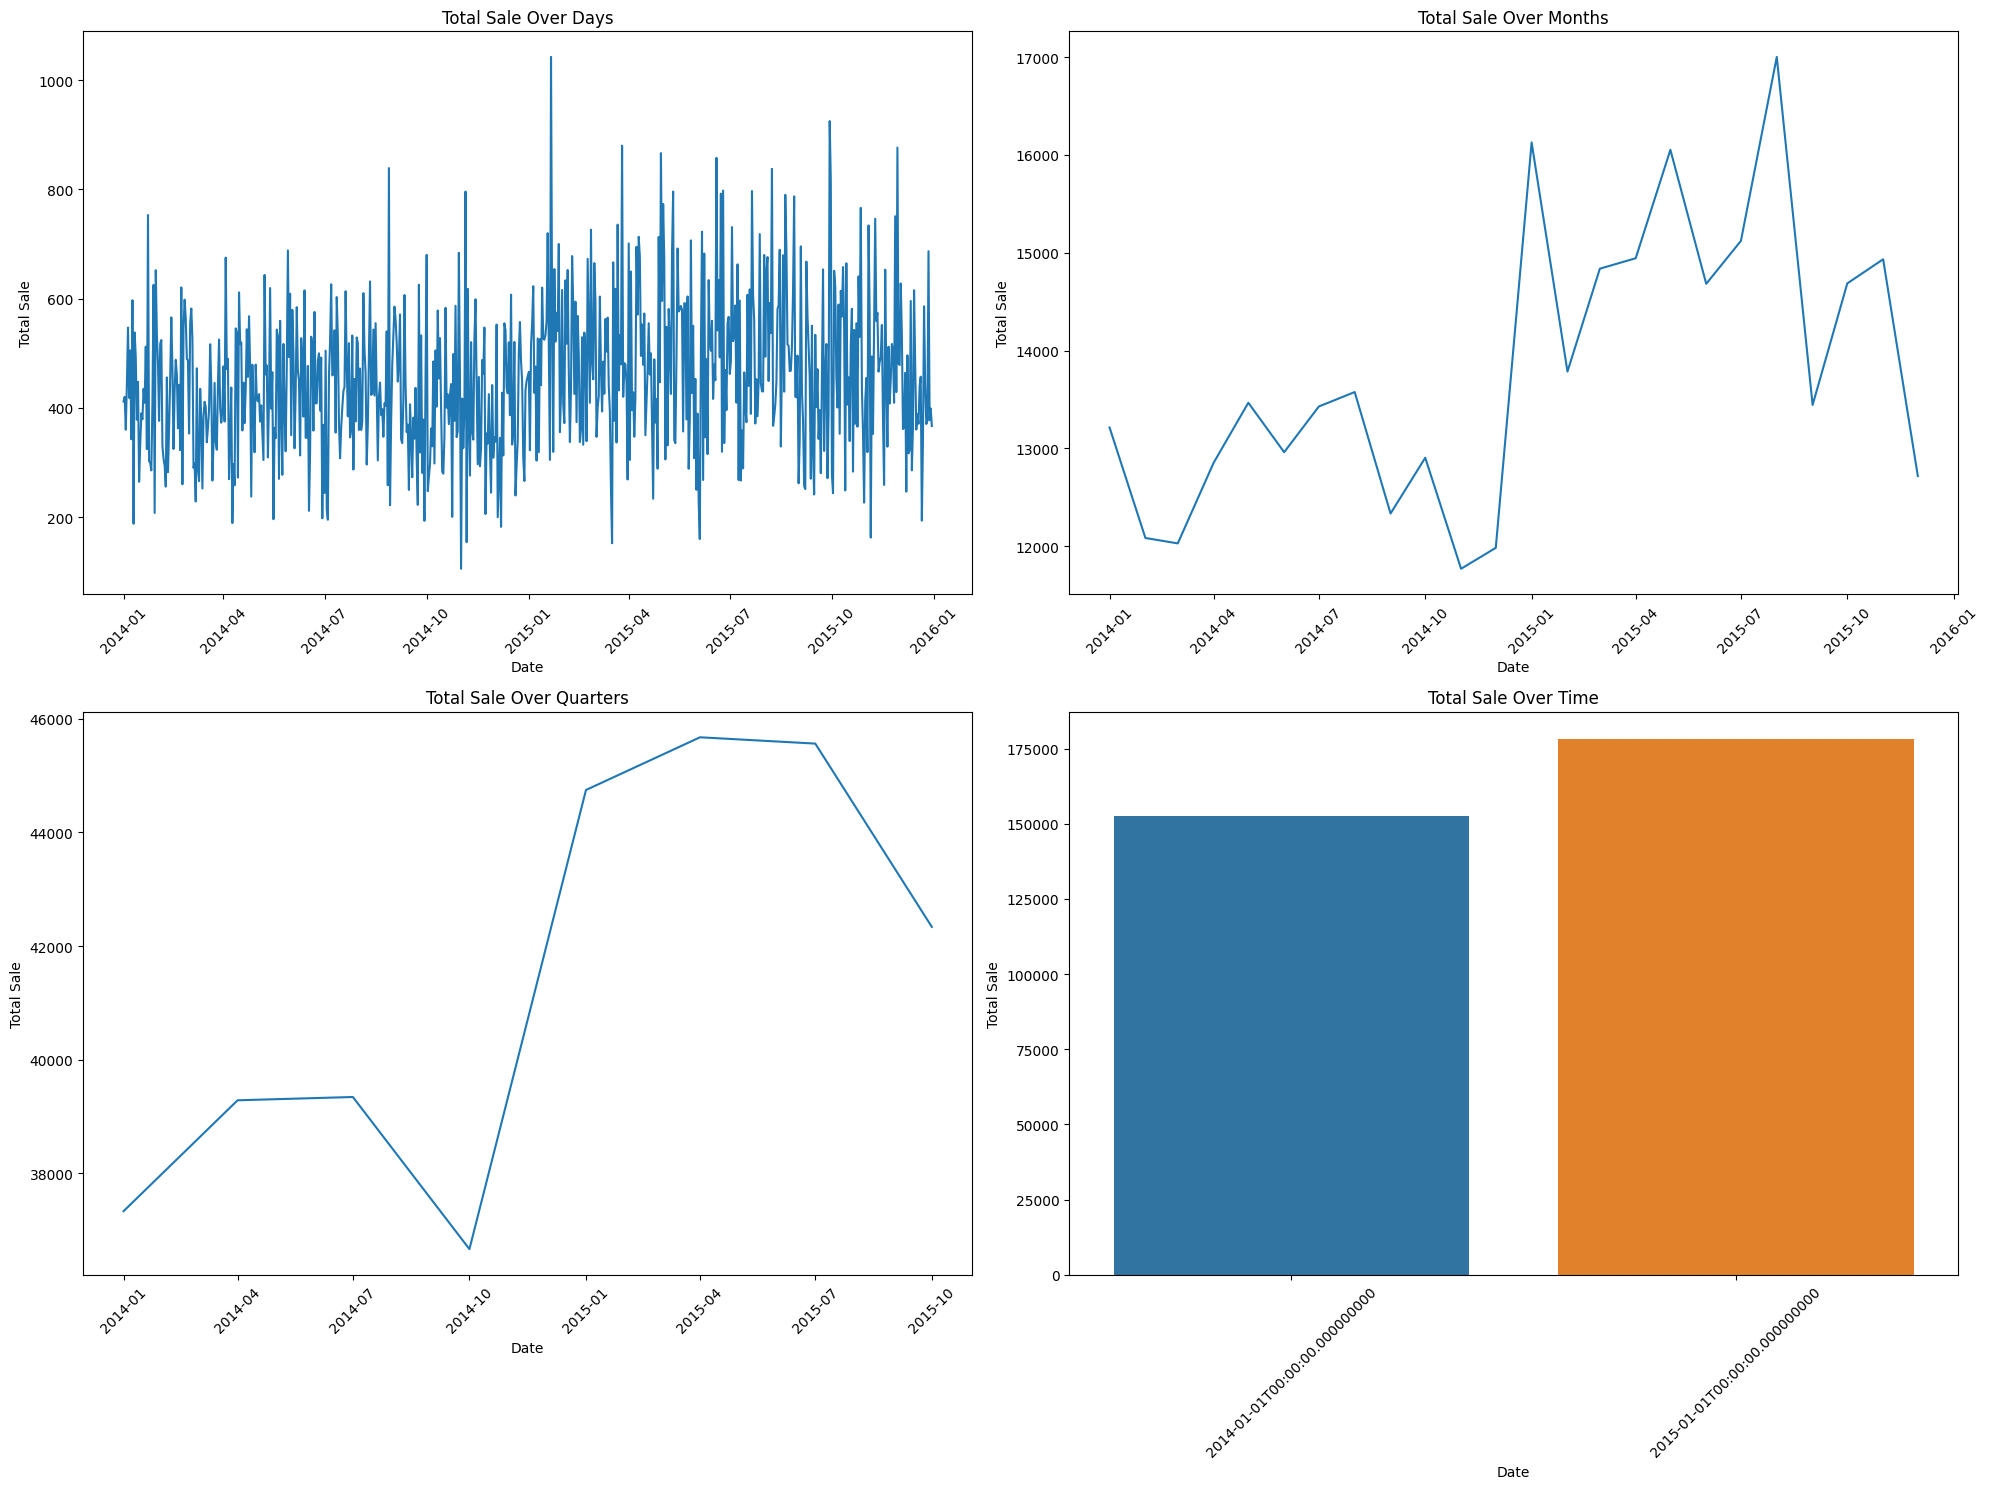

In [41]:
# Vẽ các biểu đồ
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Biểu đồ doanh thu hàng ngày
sns.lineplot(ax=axes[0, 0], data=daily_sale, x='Date', y='Total Sale')
axes[0, 0].set_title('Total Sale Over Days')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Total Sale')
axes[0, 0].tick_params(axis='x', rotation=45)

# Biểu đồ doanh thu hàng tháng
sns.lineplot(ax=axes[0, 1], data=monthly_sale, x='Date', y='Total Sale')
axes[0, 1].set_title('Total Sale Over Months')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Total Sale')
axes[0, 1].tick_params(axis='x', rotation=45)

# Biểu đồ doanh thu hàng quý
sns.lineplot(ax=axes[1, 0], data=quarterly_sale, x='Date', y='Total Sale')
axes[1, 0].set_title('Total Sale Over Quarters')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Total Sale')
axes[1, 0].tick_params(axis='x', rotation=45)

# Biểu đồ doanh thu hàng năm
sns.barplot(ax=axes[1, 1], data=yearly_sale, x='Date', y='Total Sale')
axes[1, 1].set_title('Total Sale Over Years')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Total Sale')
axes[1, 1].tick_params(axis='x', rotation=45)
plt.title('Total Sale Over Time')

plt.tight_layout()
plt.savefig('Total Sale Over Time')
plt.show()

In [42]:
product_sales = df.groupby('productName')['gross_sales'].sum().reset_index()

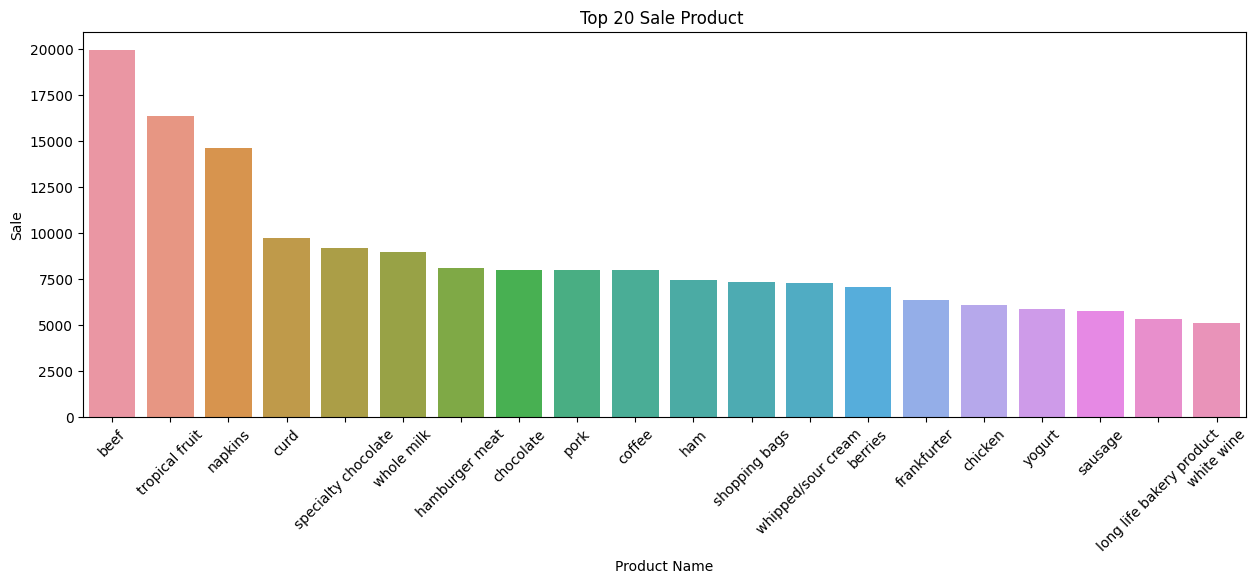

In [43]:
plt.figure(figsize=(15, 5))
sns.barplot(data=product_sales.sort_values(by='gross_sales', ascending=False).head(20), x='productName', y='gross_sales')
plt.title('Top 20 Sale Product ')
plt.xlabel('Product Name')
plt.ylabel('Sale')
plt.xticks(rotation=45)
plt.savefig("Top 20 Sale per Product")
plt.show()

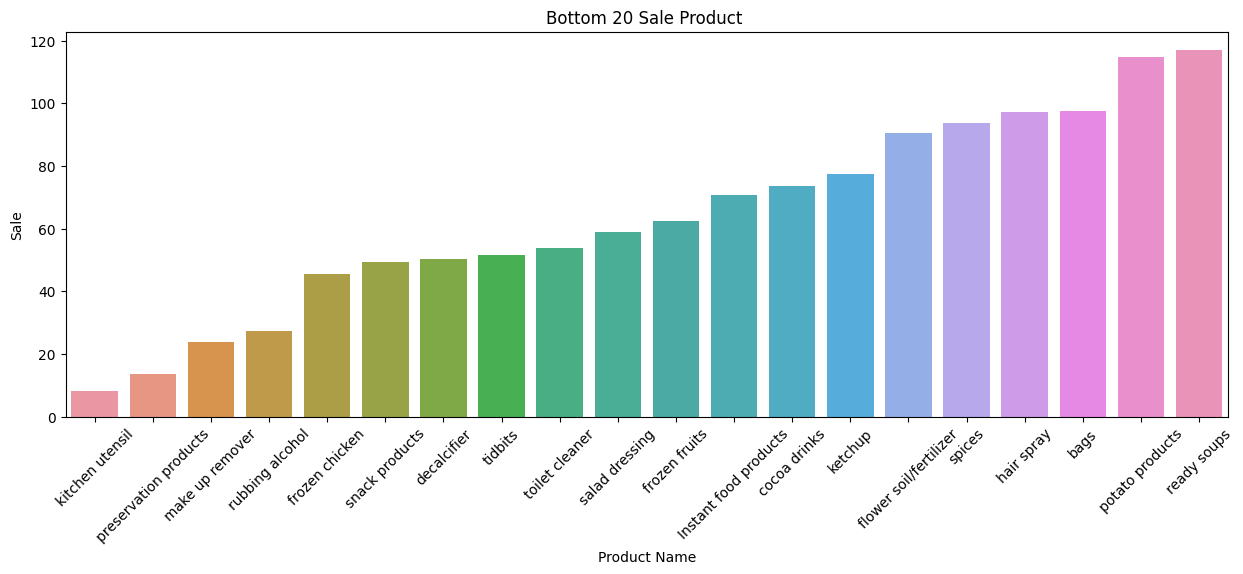

In [44]:
plt.figure(figsize=(15, 5))
sns.barplot(data=product_sales.sort_values(by='gross_sales', ascending=True).head(20), x='productName', y='gross_sales')
plt.title('Bottom 20 Sale Product ')
plt.xlabel('Product Name')
plt.ylabel('Sale')
plt.xticks(rotation=45)
plt.savefig("Bottom 20 Sale per Product")
plt.show()

### Tạo bảng RFM analysis cho mỗi khách hàng

In [10]:
max_date = df['Date'].max().date()

Recency = lambda x : (max_date - x.max().date()).days
Frequency  = lambda x: len(x.unique())
Monetary = lambda x : round(sum(x), 2)

df_RFM = df.groupby('Member_number').agg({'Date': Recency,
                                        'productId': Frequency,
                                        'gross_sales': Monetary })

In [10]:
df_RFM.head()

Date  productId  gross_sales
Member_number                              
1000             35         11        53.80
1001            242          9       100.00
1002            122          8        70.31
1003            323          6        60.65
1004             28         16       204.97

In [11]:
# Rename the columns of DataFrame
df_RFM.columns = ['Recency', 'Frequency', 'Monetary']
# Descending Sorting
df_RFM = df_RFM.sort_values('Monetary', ascending=False)

In [48]:
df_RFM.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3898 entries, 2193 to 4565
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    3898 non-null   int64  
 1   Frequency  3898 non-null   int64  
 2   Monetary   3898 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 121.8+ KB


In [49]:
df_RFM.head()

Recency  Frequency  Monetary
Member_number                              
2193                91         21    361.45
1793                26         19    345.10
3289                 4         21    334.17
2433                 3         24    316.81
2743               142         15    312.47

In [224]:
df_RFM.columns

Index(['Recency', 'Frequency', 'Monetary'], dtype='object')

In [50]:
df_RFM.shape

(3898, 3)

In [51]:
df_RFM.describe().T

count        mean         std  min    25%      50%      75%  \
Recency    3898.0  187.701385  159.912688  0.0  57.00  141.000  280.000   
Frequency  3898.0    8.918933    4.403278  1.0   6.00    8.500   12.000   
Monetary   3898.0   84.899107   55.349016  1.1  43.57   74.755  114.975   

              max  
Recency    727.00  
Frequency   26.00  
Monetary   361.45

In [52]:
df_RFM.to_csv("RFM.csv", index=False)

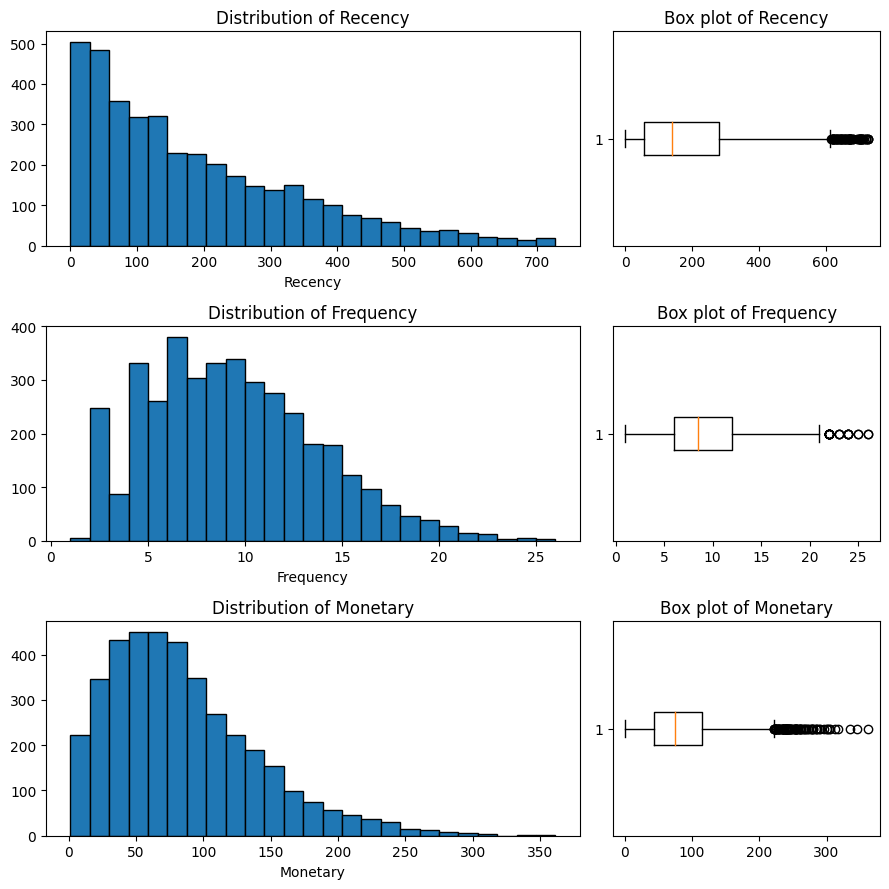

In [53]:
# Tạo figure và GridSpec
fig = plt.figure(figsize=(9, 9))
gs = GridSpec(3, 2, width_ratios=[2, 1]) # 3 hàng, 2 cột, với cột thứ hai hẹp hơn

# Vẽ phân phối của 'Recency'
ax0 = fig.add_subplot(gs[0, 0]) # hàng thứ nhất, cột thứ nhất
ax0.hist(df_RFM['Recency'], bins=25, edgecolor='black')
ax0.set_title('Distribution of Recency')
ax0.set_xlabel('Recency')

ax1 = fig.add_subplot(gs[0, 1]) # hàng thứ nhất, cột thứ hai
ax1.boxplot(df_RFM['Recency'], vert=False)
ax1.set_title('Box plot of Recency')

# Vẽ phân phối của 'Frequency'
ax2 = fig.add_subplot(gs[1, 0]) # hàng thứ hai, cột thứ nhất
ax2.hist(df_RFM['Frequency'], bins=25, edgecolor='black')
ax2.set_title('Distribution of Frequency')
ax2.set_xlabel('Frequency')

ax3 = fig.add_subplot(gs[1, 1]) # hàng thứ hai, cột thứ hai
ax3.boxplot(df_RFM['Frequency'], vert=False)
ax3.set_title('Box plot of Frequency')

# Vẽ phân phối của 'Monetary'
ax4 = fig.add_subplot(gs[2, 0]) # hàng thứ ba, cột thứ nhất
ax4.hist(df_RFM['Monetary'], bins=25, edgecolor='black')
ax4.set_title('Distribution of Monetary')
ax4.set_xlabel('Monetary')

ax5 = fig.add_subplot(gs[2, 1]) # hàng thứ ba, cột thứ hai
ax5.boxplot(df_RFM['Monetary'], vert=False)
ax5.set_title('Box plot of Monetary')

# Tinh chỉnh khoảng cách giữa các biểu đồ
plt.tight_layout()
plt.savefig('RFM_Distribution.png')
plt.show()

Dựa trên biểu đồ, chúng ta có thể nhận xét về phân phối của ba biến như sau:

Phân phối về Thời gian gần đây (Recency):
- Phân phối của biến Recency tương đối đều.

Phân phối về Tần suất (Frequency):
- Biến Frequency có phân phối lệch phải (positively skewed)
- Có một số khách hàng có tần suất cao hơn, nhưng phần lớn tần suất tập trung ở mức thấp.

Phân phối về Giá trị (Monetary):
- Phân phối của biến Monetary cũng lệch phải (positively skewed).
- Có một số khách hàng có chi tiêu cao hơn so với phần lớn các khách hàng khác.

Cả 3 biến đều có outlier cần xử lý

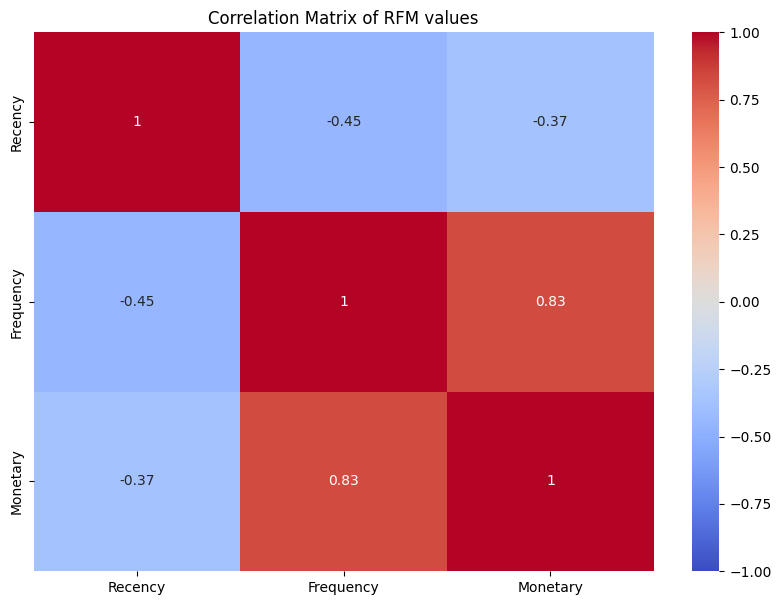

<Figure size 640x480 with 0 Axes>

In [54]:
plt.figure(figsize=(10, 7))
corr_matrix = df_RFM[['Recency', 'Frequency', 'Monetary']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of RFM values')
plt.show()
plt.savefig('RFM_Correlation.png')

- 'Frequency' và 'Monetary' có mối tương quan rất cao

### Xử lý outlier cho từng cột 'Recency', 'Frequency', 'Monetary'

In [12]:
#Outlier detection function
def outliers_detect(df ,f):
    Q1 = np.percentile(df[f], 25)
    Q3 = np.percentile(df[f], 75)

    upper_outlier = df[df[f] > (Q3 + 1.5*(Q3 - Q1))].shape[0]
    lower_outlier = df[df[f] < (Q1 - 1.5*(Q3 - Q1))].shape[0]
    print('Phần trăm outlier:', round(((upper_outlier+lower_outlier)/df.shape[0])*100,2),'%')
    print('Số lượng outlier:', upper_outlier + lower_outlier)

In [13]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

In [14]:
df_filtered = df_RFM.copy()

In [15]:
for i in df_filtered.columns:
    print('====================',i, '====================')
    outliers_detect(df_filtered,i)
    print()

==================== Recency ====================
Phần trăm outlier: 1.74 %
Số lượng outlier: 68

==================== Frequency ====================
Phần trăm outlier: 0.64 %
Số lượng outlier: 25

==================== Monetary ====================
Phần trăm outlier: 2.46 %
Số lượng outlier: 96



In [16]:
# In ra số lượng hàng trước khi loại bỏ outlier
initial_count = len(df_RFM)
print(f"Số lượng hàng ban đầu: {initial_count}")

# Loại bỏ outlier cho từng cột trong danh sách
for column in ['Recency', 'Frequency', 'Monetary']:
    df_filtered = remove_outliers_iqr(df_filtered, column)

# In ra số lượng hàng sau khi loại bỏ outlier
final_count = len(df_filtered)
print(f"Số lượng hàng sau khi loại bỏ outlier: {final_count}")

# Tính và in phần trăm số lượng outlier
outliers_percentage = ((initial_count - final_count) / initial_count) * 100
print(f"Phần trăm outlier đã loại bỏ: {outliers_percentage:.2f}%")

Số lượng hàng ban đầu: 3898
Số lượng hàng sau khi loại bỏ outlier: 3718
Phần trăm outlier đã loại bỏ: 4.62%


## Bước 4 & 5: Modeling & Evaluation/Analyze & Report

### Xây dựng giải pháp phân cụm khách hàng theo RFM:

### Với tập luật tự định nghĩa (Dữ liệu cần được xử lý ngoại lệ)

### Với thuật toán phân cụm:
- RFM + Kmeans (sklearn)(Dữ liệu cần được xử lý ngoại lệ)
- RFM + Hierarchical Cluster (Dữ liệu cần được xử lý ngoại lệ)
- RFM + Kmeans (pySpark) (Dữ liệu cần được xử lý ngoại lệ)

## Phân cụm khách hàng theo RFM với tập luật tự định nghĩa RFM_Level Function

### Tính toán RFM quartiles

In [17]:
# Create labels for Recency, Frequency, Monetary
r_labels = range(4, 0, -1) # số ngày tính từ lần cuối mua hàng lớn thì gán nhãn nhỏ, ngược lại thì nhãn lớn
f_labels = range(1, 5)
m_labels = range(1, 5)

In [61]:
[*r_labels]

[4, 3, 2, 1]

In [18]:
# Assign these labels to 4 equal percentile groups
r_groups = pd.qcut(df_filtered['Recency'].rank(method='first'), q=4, labels=r_labels)

f_groups = pd.qcut(df_filtered['Frequency'].rank(method='first'), q=4, labels=f_labels)

m_groups = pd.qcut(df_filtered['Monetary'].rank(method='first'), q=4, labels=m_labels)

In [19]:
# Create new columns R, F, M
df_filtered = df_filtered.assign(R = r_groups.values, F = f_groups.values,  M = m_groups.values)
df_filtered.head()

Recency  Frequency  Monetary  R  F  M
Member_number                                       
1259                33         13    220.04  4  4  4
2738                51         17    220.00  4  4  4
1949               161         13    219.81  2  4  4
1090                70         11    219.20  3  3  4
1677                21         11    219.01  4  3  4

### Tạo RFM Segments

In [20]:
def join_rfm(x): return str(int(x['R'])) + str(int(x['F'])) + str(int(x['M']))
df_filtered['RFM_Segment'] = df_filtered.apply(join_rfm, axis=1)

In [65]:
df_filtered.head()

Recency  Frequency  Monetary  R  F  M RFM_Segment
Member_number                                                   
1259                33         13    220.04  4  4  4         444
2738                51         17    220.00  4  4  4         444
1949               161         13    219.81  2  4  4         244
1090                70         11    219.20  3  3  4         334
1677                21         11    219.01  4  3  4         434

#### Số lượng các segment

In [66]:
rfm_count_unique = df_filtered.groupby('RFM_Segment')['RFM_Segment'].nunique()

In [67]:
print(rfm_count_unique.sum())

62


- Having 62 different segments using the concatenate method quickly becomes unwieldy for any practical use. We will need a more concise way to define our segments.

#### Tính RFM score và phân loại khách hàng

In [21]:
# Calculate RFM_Score
df_filtered['RFM_Score'] = df_filtered[['R','F','M']].sum(axis=1)
df_filtered.head()

Recency  Frequency  Monetary  R  F  M RFM_Segment  RFM_Score
Member_number                                                              
1259                33         13    220.04  4  4  4         444         12
2738                51         17    220.00  4  4  4         444         12
1949               161         13    219.81  2  4  4         244         10
1090                70         11    219.20  3  3  4         334         10
1677                21         11    219.01  4  3  4         434         11

| Label               |alias| R-F-M  |Description        |
|---------------------|----------------|----------------|----------------|
| Champions           | CHAMP |4-4-4  |Bought recently, buy often and spend the most |
| Loyal Customers     | LOYAL|?-?-4  |Spend good money. Responsive to promotions |
| Potential Loyalist  | POT_LOYAL|4-23-3  |Recent customers, spent good amount, bought more than once |
| New Customers       | NEW|4-1-?  |New customers|
| Promising           | PROMISING|4-?-12  |Recent shoppers, but haven't spent much |
| Need Attention      | ATTENTION|3-3-3 |Above average recency, frequency & monetary values |
| About To Sleep      | ABT_SLEEP|12-12-12 |Below average recency, frequency & monetary values |
| At Risk             | RISK|2-4-4  |Spent big money, purchased often but quite long time ago |
| Can’t Lose Them     | CANT_LOSE|1-4-4  |Made big purchases and often, but long time ago |
| Hibernating         | HIBER|1-2-2  |Low spenders, low frequency, purchased long time ago |
| Lost                | LOST|1-1-1   |Lowest recency, frequency & monetary scores |


In [22]:
def rfm_level(df):
    # Check for special 'Champions' and 'New Customers' and 'Can’t Lose Them' conditions first
    if df['RFM_Score'] == 12:
        return 'CHAMP' # Bought recently, buy often and spend the most
    elif df['R'] == 4 and df['F'] == 1 and df['M'] == 1:
        return 'NEW'
    elif df['R'] == 1 and df['F'] == 4 and df['M'] == 4:
        return 'CANT_LOSE' # Made big purchases and often, but long time ago
    elif df['RFM_Score'] == 3:
        return 'LOST'    # Lowest recency, frequency & monetary scores
    elif df['R'] == 1 and df['F'] == 2 and df['M'] == 2:
        return 'HIBER' # Low spenders, low frequency, purchased long time ago
    elif df['R'] < 3 and df['F'] < 3 and df['M'] < 3:
        return 'ABT_SLEEP' # Below average recency, frequency & monetary values
    elif df['R'] == 2 and df['F'] == 4 and df['M'] == 4:
        return 'RISK' # Spent big money, purchased often but quite long time ago
    elif df['R'] == 4 and df['M'] < 3:
        return 'PROMISING' # Recent shoppers, but haven't spent much
    elif df['R'] == 4 and df['F'] >1 and df['M']>2:
        return 'POT_LOYAL' # Recent customers, spent good amount, bought more than once
    # Then check for other conditions
    elif df['M'] == 4:
        return 'LOYAL'
    else:
        return 'REGULAR'

In [23]:
df_RFM_rule = df_filtered.copy()

In [24]:
# Create a new column RFM_Level
df_RFM_rule['RFM_Level'] = df_RFM_rule.apply(rfm_level, axis=1)

In [25]:
df_RFM_rule.head()

Recency  Frequency  Monetary  R  F  M RFM_Segment  RFM_Score  \
Member_number                                                                 
1259                33         13    220.04  4  4  4         444         12   
2738                51         17    220.00  4  4  4         444         12   
1949               161         13    219.81  2  4  4         244         10   
1090                70         11    219.20  3  3  4         334         10   
1677                21         11    219.01  4  3  4         434         11   

               RFM_Level  
Member_number             
1259               CHAMP  
2738               CHAMP  
1949                RISK  
1090               LOYAL  
1677           POT_LOYAL

In [26]:
df_RFM_rule['RFM_Level'].unique()

array(['CHAMP', 'RISK', 'LOYAL', 'POT_LOYAL', 'CANT_LOSE', 'REGULAR',
       'PROMISING', 'ABT_SLEEP', 'HIBER', 'LOST', 'NEW'], dtype=object)

In [74]:
df_RFM_rule.to_csv('RFM_rule_segments.csv')

#### Number of segments

In [75]:
df_RFM_rule['RFM_Level'].value_counts()

REGULAR      1226
ABT_SLEEP     540
LOYAL         388
POT_LOYAL     328
LOST          323
CHAMP         269
PROMISING     241
RISK          150
HIBER         137
NEW            72
CANT_LOSE      44
Name: RFM_Level, dtype: int64

#### Calculate mean values for each segment

In [27]:
# Calculate average values for each RFM_Level, and return a size of each segment
rfm_agg = df_RFM_rule.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(0)

rfm_agg.columns = rfm_agg.columns.droplevel()
rfm_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_agg['Percent'] = round((rfm_agg['Count']/rfm_agg.Count.sum())*100, 2)

# Reset the index
rfm_agg = rfm_agg.reset_index()

In [77]:
rfm_agg

RFM_Level  RecencyMean  FrequencyMean  MonetaryMean  Count  Percent
0   ABT_SLEEP        265.0            5.0          42.0    540    14.52
1   CANT_LOSE        338.0           13.0         143.0     44     1.18
2       CHAMP         28.0           15.0         156.0    269     7.24
3       HIBER        384.0            7.0          58.0    137     3.68
4        LOST        428.0            3.0          21.0    323     8.69
5       LOYAL        151.0           12.0         144.0    388    10.44
6         NEW         23.0            4.0          23.0     72     1.94
7   POT_LOYAL         28.0           11.0         103.0    328     8.82
8   PROMISING         29.0            8.0          54.0    241     6.48
9     REGULAR        174.0            9.0          72.0   1226    32.97
10       RISK        199.0           14.0         152.0    150     4.03

#### TreeMap

In [78]:
df_RFM_rule['RFM_Level'].unique()

array(['CHAMP', 'RISK', 'LOYAL', 'POT_LOYAL', 'CANT_LOSE', 'REGULAR',
       'PROMISING', 'ABT_SLEEP', 'HIBER', 'LOST', 'NEW'], dtype=object)

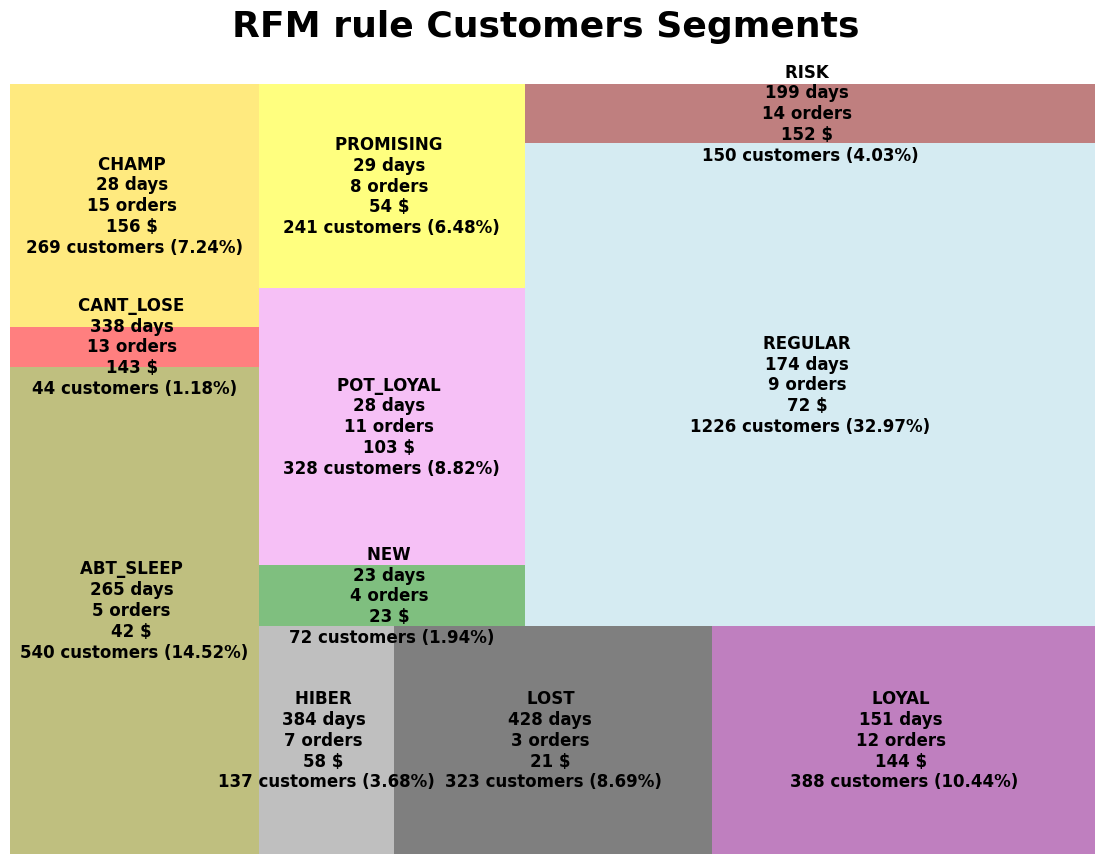

In [28]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 10)

colors_dict = {
    'CHAMP': 'gold',
    'LOYAL': 'purple',
    'POT_LOYAL': 'violet',
    'NEW': 'green',
    'PROMISING': 'yellow',
    'Need Attention': 'orange',
    'ABT_SLEEP': 'olive',
    'RISK': 'maroon',
    'CANT_LOSE': 'red',
    'HIBER': 'grey',
    'LOST': 'black',
    'REGULAR': 'lightblue'
}

# Tạo danh sách màu theo thứ tự nhãn trong rfm_agg
colors = [colors_dict[label] for label in rfm_agg['RFM_Level']]

squarify.plot(sizes=rfm_agg['Count'],
              text_kwargs={'fontsize':12,'weight':'bold', 'fontname':"sans serif"},
              color=colors,
              label=['{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} customers ({}%)'.format(*rfm_agg.iloc[i])
                      for i in range(0, len(rfm_agg))], alpha=0.5 )


plt.title("RFM rule Customers Segments \n",fontsize=26,fontweight="bold")
plt.axis('off')

plt.savefig('RFM rule Segments.png')
plt.show()

#### Scatter Plot (RFM)

In [29]:
fig = px.scatter(rfm_agg, x="RecencyMean", y="MonetaryMean", size="FrequencyMean", color="RFM_Level",
           hover_name="RFM_Level", size_max=100, title="RFM Rule segments 2D Scatter plot")
for level, color in colors_dict.items():
    fig.update_traces(marker=dict(color=color), selector=dict(name=level))
fig.show()

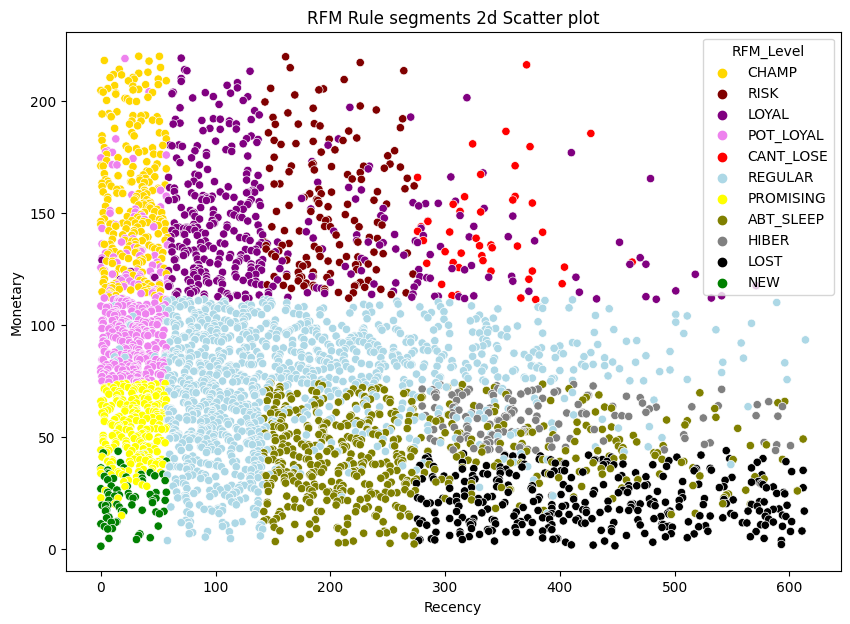

In [30]:
# Scatter plot
palette = [colors_dict[key] for key in df_RFM_rule['RFM_Level'].unique()]

plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_RFM_rule['Recency'], y=df_RFM_rule['Monetary'], hue=df_RFM_rule['RFM_Level'], palette=palette)
plt.title('RFM Rule segments 2d Scatter plot')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.savefig('RFM Rule scatter 2d.png')


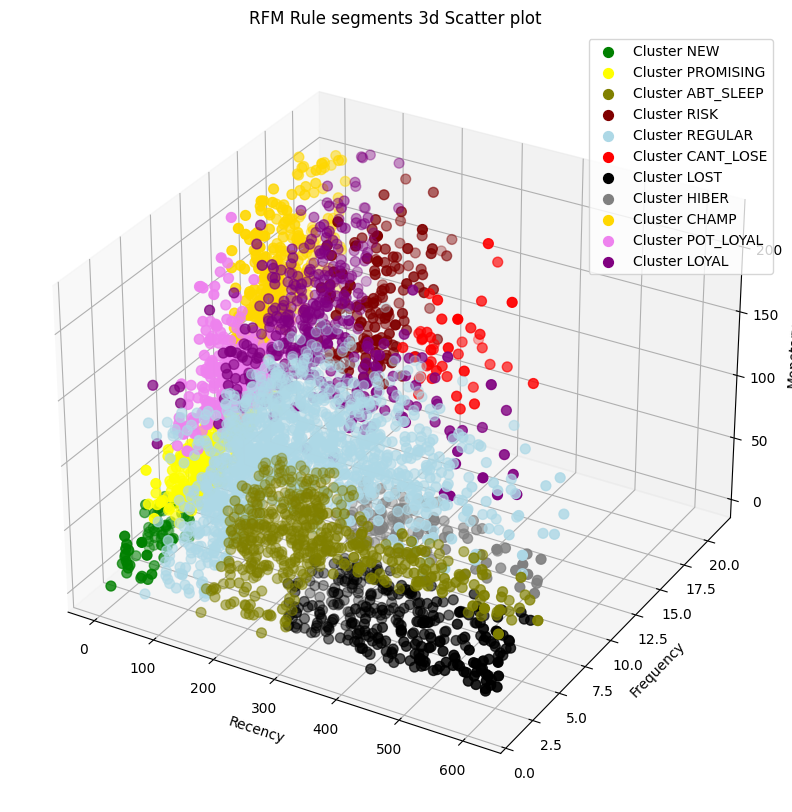

In [31]:
# Dữ liệu
x = df_RFM_rule['Recency']
y = df_RFM_rule['Frequency']
z = df_RFM_rule['Monetary']
cluster_labels = df_RFM_rule['RFM_Level']

# Tạo biểu đồ 3D Scatter plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Vẽ dữ liệu của từng cluster
for cluster in set(cluster_labels):
    ax.scatter(x[cluster_labels == cluster], y[cluster_labels == cluster], z[cluster_labels == cluster], label=f'Cluster {cluster}', s=50, color=colors_dict[cluster])

# Đặt nhãn cho trục
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# Thêm chú thích
ax.legend()
plt.title('RFM Rule segments 3d Scatter plot')

# Hiển thị biểu đồ
plt.savefig('RFM Rule scatter 3d.png')
plt.show()

In [32]:
fig = px.scatter_3d(df_RFM_rule, x='Recency', y='Frequency', z='Monetary',
                    color='RFM_Level', opacity = 0.7, title='RFM Rule  segments 3D Scatter plot')
for level, color in colors_dict.items():
    fig.update_traces(marker=dict(color=color), selector=dict(name=level))
fig.show()

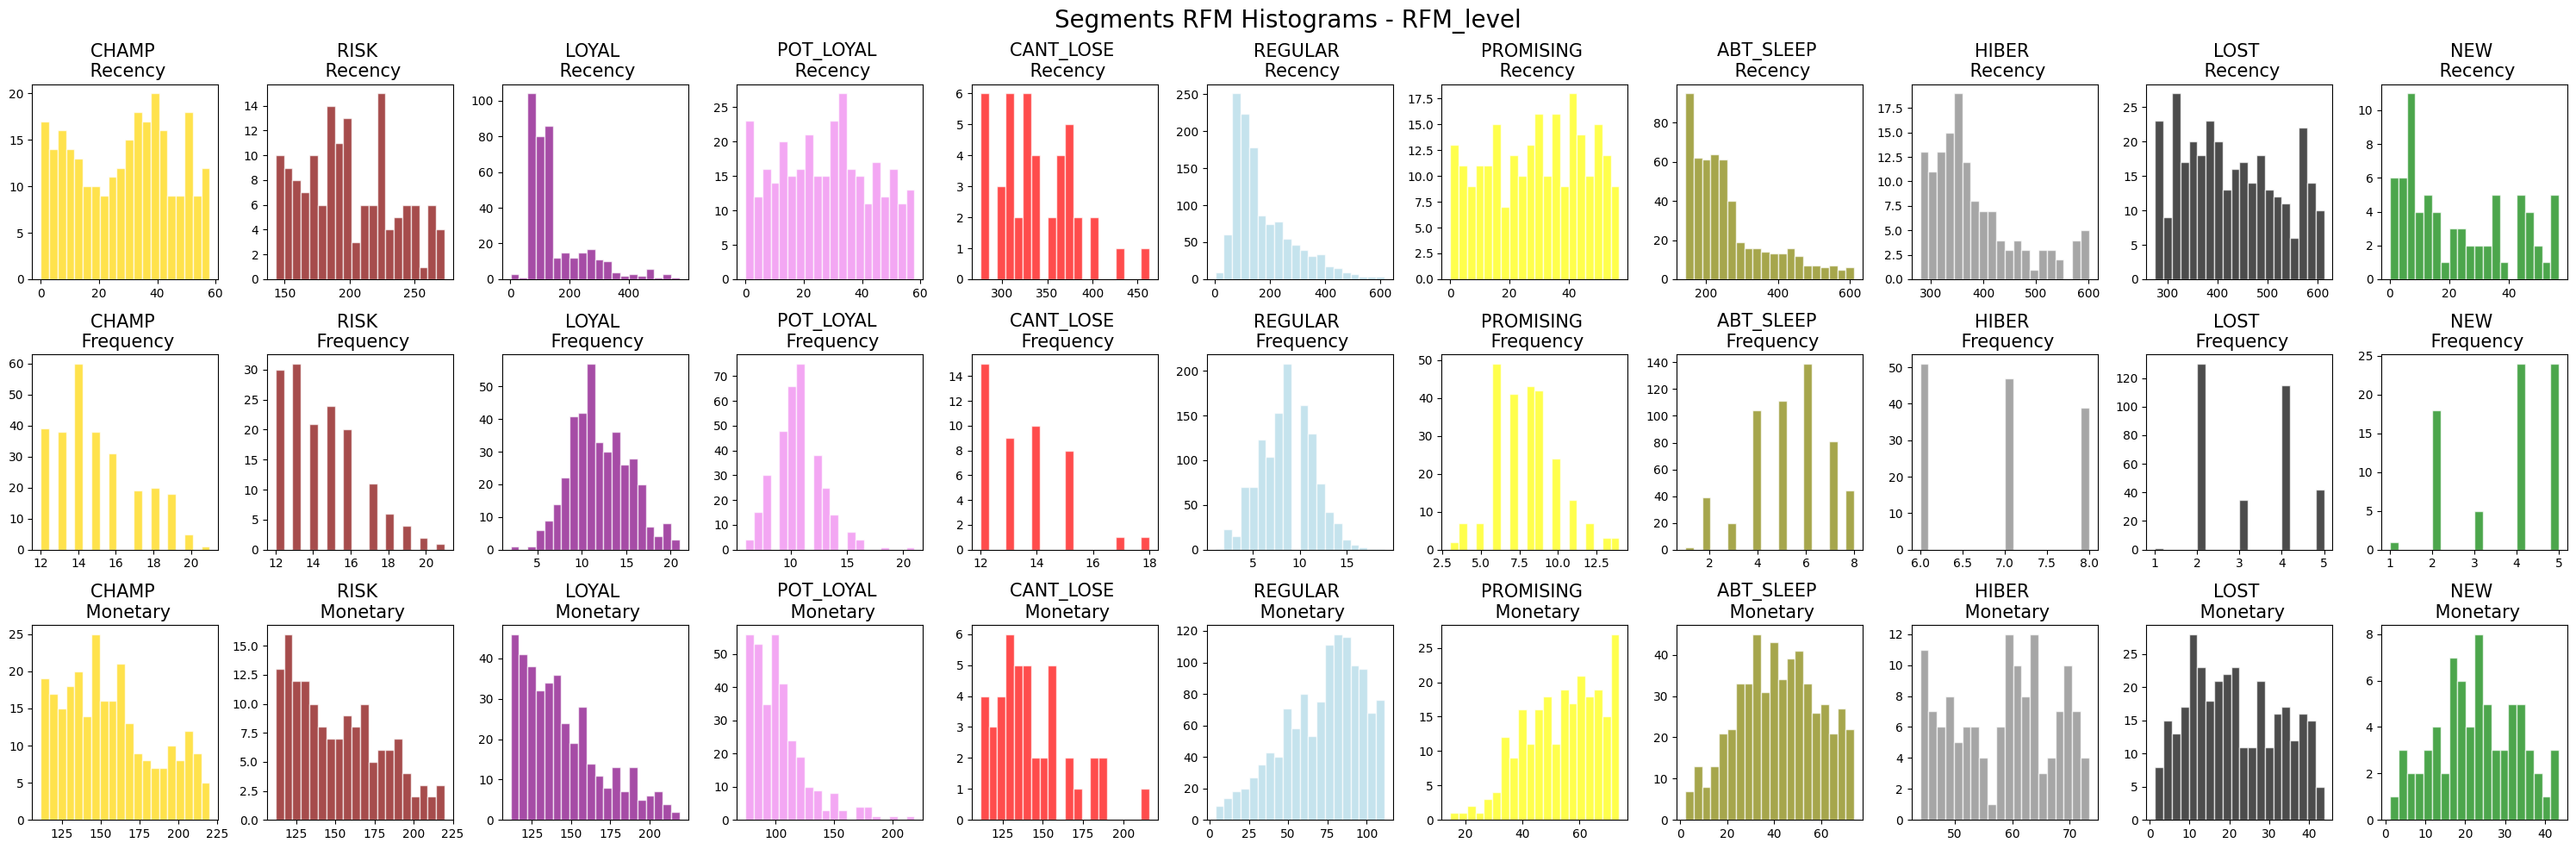

In [33]:
# Get unique clusters and features
clusters = df_RFM_rule['RFM_Level'].unique()
features = ['Recency', 'Frequency', 'Monetary']

# Set up subplots with a rectangular layout
fig, axes = plt.subplots(len(features), len(clusters), figsize=(30, 10))

# Loop through features and clusters
for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        # Select data for the current cluster and feature
        data = df_RFM_rule[df_RFM_rule['RFM_Level'] == cluster][feature]

        # Plot histogram for the current cluster and feature
        axes[i, j].hist(data, bins=20, color=colors_dict[cluster], edgecolor='w', alpha=0.7)
        axes[i, j].set_title(f'{cluster} \n {feature}', fontsize=15)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')

# Add a title to the entire plot
plt.suptitle('Segments RFM Histograms - RFM_level', fontsize=20)

# Adjusting layout to prevent overlapping
plt.tight_layout()
plt.savefig('Histograms_Segmented_by_RFM_rule_RFM_level.png')
plt.show()

### Summary:

| Nhóm               | R score | F score |M score | Nhận xét                                       |
|--------------------|-----------------------|-------------------------|------------------------|------------------------------------------------------------|
| Champions          | Cao                    | Cao                     | Cao                    | Mới mua gần đây, mua thường xuyên và chi tiêu nhiều, là nhóm khách hàng cốt lỗi của của hàng, dịch vụ khách hàng cần quan tâm đặc biệt, nhưng cần khống chế tần suất marketing để tránh tác dụng ngược, làm khách hàng khó chịu. Là nhóm khách hàng tốt để giới thiệu sản phẩm mới.       |
| Loyal Customers    | Không cao            | Cao                     | Cao                    | Chi tiêu nhiều. Đây là nhóm sẽ có phản ứng tích cực với các chương trình khuyến mãi |
| Potential Loyalist | Cao           | Không thấp                    | trên Trung bình                    | Khách hàng đầy tiềm năng, đã chi tiêu một số tiền không ít và mua hàng nhiều lần, có thể áp dụng các biện pháp kích thích tiêu dùng và khách hàng thân thiết để tăng độ kết nối với khách hàng|
| New Customers      | Thấp                   | Thấp                    | Thấp                   | Khách hàng mới, cần có những ưu đãi để tạo ấn tượng tốt thu hút và giữ chân khách hàng                                            |
| Promising          | Cao                    |  dưới cao                    | dưới cao                   | Mới mua sắm gần đây, nhưng chưa chi tiêu nhiều, là nhóm khách hàng cần quan vọng, có nhiều tiềm năng cần khai thác, thích hợp hoạt động có thể giữ chân khách hàng             |
| Need Attention     | Trung bình trở lên     | Trung bình trở lên      | Trung bình trở lên    | khách hàng cũ, nhưng thời gian gần đây không mua sắm, cần tìm hiểu nguyên nhân |
| About To Sleep     | Dưới trung bình       | Dưới trung bình         | Dưới trung bình       | nguy cơ cao sắp mất khách, cần tìm hiểu thông vin và có biện pháp kích thích khách |
| At Risk            | Trung bình             | Cao                     | Cao                    | Chi tiêu một số tiền lớn, mua hàng thường xuyên nhưng thời gian chưa mua dưới trung bình, khá lâu chưa mua sắm, cần đặc biệt tìm hiểu nguyên nhân, quan tâm, thi thố biện pháp để giải quyết vấn đề, tái kích hoạt như thăm hỏi, khuyến mãi... |
| Cannot Lose Them   | Thấp                   | Cao                     | Cao                    | Chi tiêu một số tiền lớn và thường xuyên, nhưng đã lâu chưa mua sắm, đây là nhóm khách hàng không thể mất, từng là khách hàng nồng cốt, nhưng do những nguyên nhân nào đó mà không còn mua sắm, cần đặc biệt tìm hiểu nguyên nhân, quan tâm, thi thố biện pháp để giải quyết vấn đề, tái kích hoạt như thăm hỏi, khuyến mãi...|
| Hibernating        | Cao                    | Thấp                    | Thấp                   | Chi tiêu thấp, mua hàng ít, lâu rồi, thích hợp một ít biện pháp khuyến mãi                       |
| Lost               | Thấp                   | Thấp                    | Thấp                   | nhóm khách hàng đã mất, có khả năng chỉ là khách vãng du... thích hợp quảng cáo chi phí thấp (email...)|
| Regulars           | Trung bình             | Trung bình              | Trung bình             | Khách hàng thông thường, có thể áp dụng một số biện pháp khuyễn mãi chung                                   |



##  phân cụm khách hàng theo RFM phối hợp với thuật toán phân cụm KMeans (sklearn)
- Dữ liệu đã được xử lý ngoại lệ
- Dữ liệu không lớn
### Kmeans clusters with the Elbow Method

In [85]:
df_kmean = df_filtered[['Recency','Frequency','Monetary']]

In [86]:
df_kmean.head()

Recency  Frequency  Monetary
Member_number                              
1259                33         13    220.04
2738                51         17    220.00
1949               161         13    219.81
1090                70         11    219.20
1677                21         11    219.01

In [87]:
df_kmean.tail()

Recency  Frequency  Monetary
Member_number                              
1560               593          2       1.9
1221               410          2       1.7
4029               429          1       1.6
1250               448          2       1.3
4565                 0          1       1.1

In [88]:
# Chuẩn hóa dữ liệu sử dụng StandardScaler
scaler = sdscale()
df_kmean_scaled = scaler.fit_transform(df_kmean)

In [89]:
sse = {}
for k in range(1, 20):
    kmeans = KM(n_clusters=k, random_state=42)
    kmeans.fit(df_kmean_scaled)
    sse[k] = kmeans.inertia_ # lSSE to cosest cluster centroid

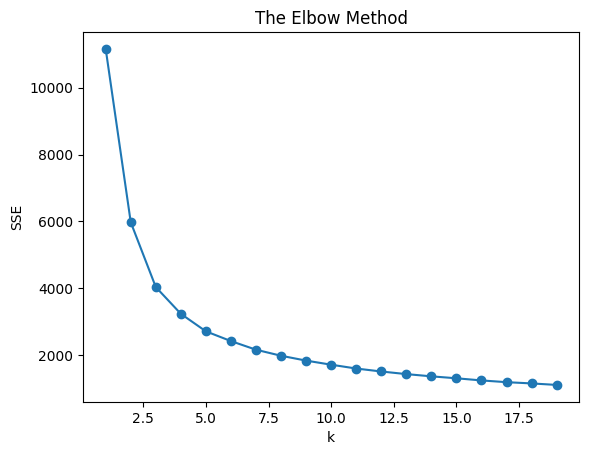

In [90]:
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')

plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.savefig('The Elbow Method sklearn.png')
plt.show()

In [91]:
# Build model with k=5
kmean1_model = KM(n_clusters=5, random_state=42)
kmean1_model.fit(df_kmean_scaled)
kmean1_model.labels_.shape

(3718,)

In [92]:
df_kmean["Cluster"] = kmean1_model.labels_
df_kmean.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(2)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0        120.50      5.50    42.40   902
1         76.75     10.19    90.67   959
2        422.14      4.34    34.21   604
3        299.07      9.08    86.51   566
4        101.96     14.54   155.09   687

In [93]:
df_kmean

Recency  Frequency  Monetary  Cluster
Member_number                                       
1259                33         13    220.04        4
2738                51         17    220.00        4
1949               161         13    219.81        4
1090                70         11    219.20        4
1677                21         11    219.01        4
...                ...        ...       ...      ...
1560               593          2      1.90        2
1221               410          2      1.70        2
4029               429          1      1.60        2
1250               448          2      1.30        2
4565                 0          1      1.10        0

[3718 rows x 4 columns]

In [94]:
df_kmean['Cluster'] = 'Cluster '+ df_kmean['Cluster'].astype('str')
df_kmean.head()

Recency  Frequency  Monetary    Cluster
Member_number                                         
1259                33         13    220.04  Cluster 4
2738                51         17    220.00  Cluster 4
1949               161         13    219.81  Cluster 4
1090                70         11    219.20  Cluster 4
1677                21         11    219.01  Cluster 4

In [95]:
df_kmean.to_csv('kmean_sklearn_segments.csv')

In [96]:
# Calculate average values for each RFM_Level, and return a size of each segment
rfm_agg2 = df_kmean.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(0)

rfm_agg2.columns = rfm_agg2.columns.droplevel()
rfm_agg2.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_agg2['Percent'] = round((rfm_agg2['Count']/rfm_agg2.Count.sum())*100, 2)

# Reset the index
rfm_agg2 = rfm_agg2.reset_index()

# Print the aggregated dataset
rfm_agg2

Cluster  RecencyMean  FrequencyMean  MonetaryMean  Count  Percent
0  Cluster 0        120.0            5.0          42.0    902    24.26
1  Cluster 1         77.0           10.0          91.0    959    25.79
2  Cluster 2        422.0            4.0          34.0    604    16.25
3  Cluster 3        299.0            9.0          87.0    566    15.22
4  Cluster 4        102.0           15.0         155.0    687    18.48

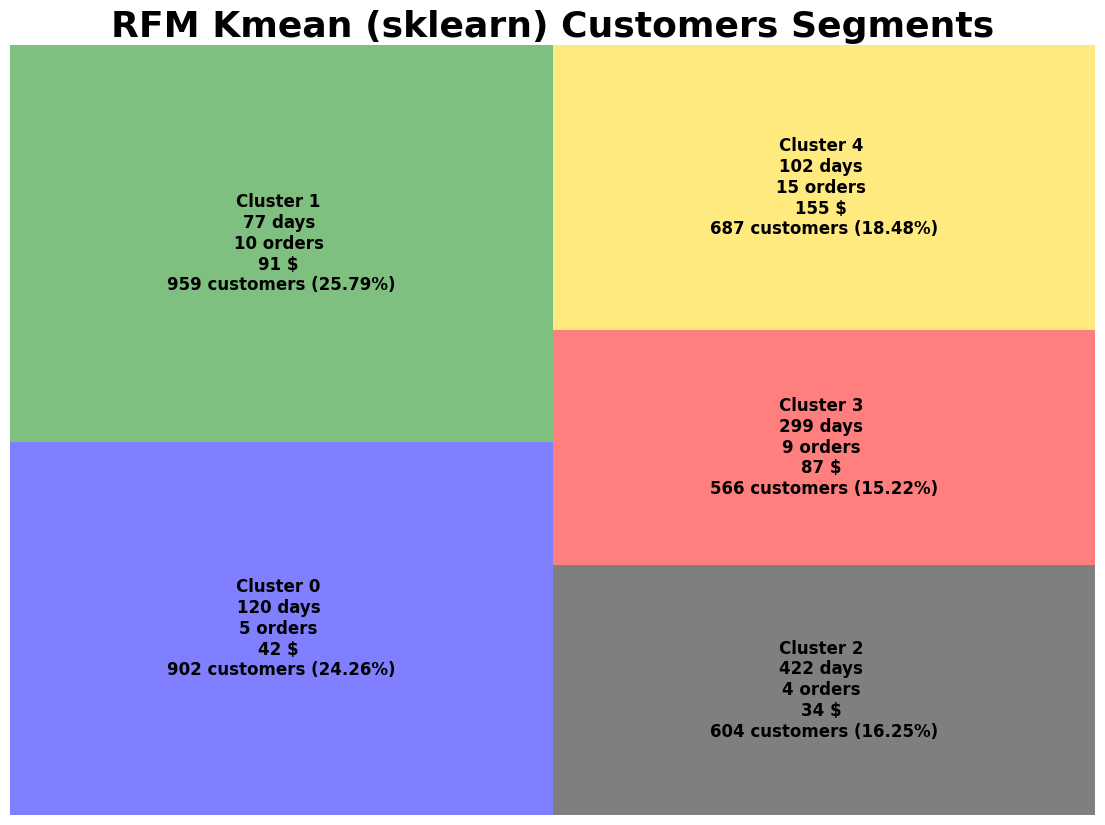

In [97]:

#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 10)

colors_dict2 = {'Cluster 0':'blue','Cluster 1':'green', 'Cluster 2':'black',
               'Cluster 3':'red', 'Cluster 4':'gold'}

colors = [colors_dict2[label] for label in rfm_agg2['Cluster']]

squarify.plot(sizes=rfm_agg2['Count'],
              text_kwargs={'fontsize':12,'weight':'bold', 'fontname':"sans serif"},
              color=colors_dict2.values(),
              label=['{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} customers ({}%)'.format(*rfm_agg2.iloc[i])
                      for i in range(0, len(rfm_agg2))], alpha=0.5 )


plt.title("RFM Kmean (sklearn) Customers Segments",fontsize=26,fontweight="bold")
plt.axis('off')

plt.savefig('kmean_sklearn Unsupervised Segments.png')
plt.show()

In [98]:
fig = px.scatter(rfm_agg2, x="RecencyMean", y="MonetaryMean", size="FrequencyMean", color="Cluster",
           hover_name="Cluster", size_max=100, title="RFM kmean sklearn segments 2D Scatter plot")
for level, color in colors_dict2.items():
    fig.update_traces(marker=dict(color=color), selector=dict(name=level))

fig.show()

In [99]:
colors_dict2

{'Cluster 0': 'blue',
 'Cluster 1': 'green',
 'Cluster 2': 'black',
 'Cluster 3': 'red',
 'Cluster 4': 'gold'}

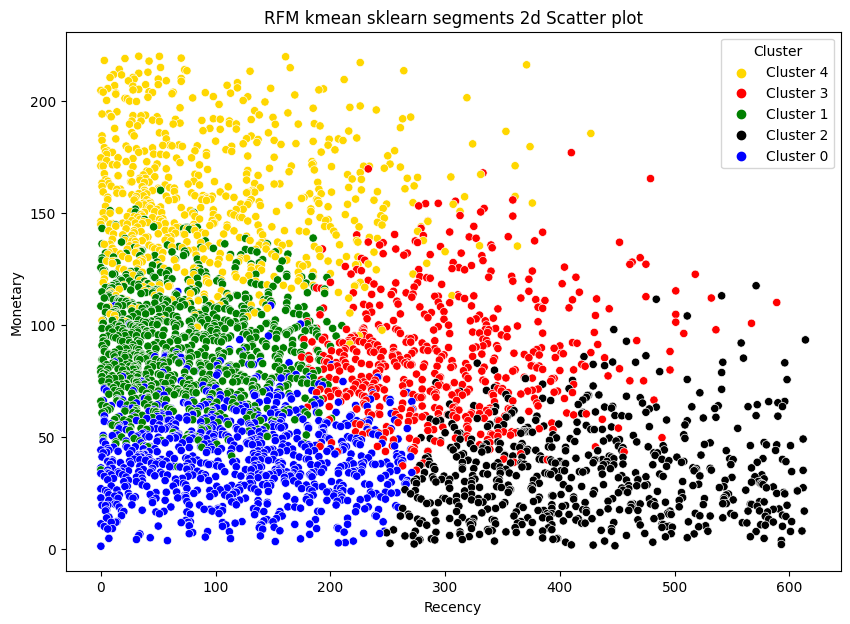

In [100]:
# Scatter plot
palette2 = [colors_dict2[key] for key in df_kmean['Cluster'].unique()]
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_kmean['Recency'], y=df_kmean['Monetary'], hue=df_kmean['Cluster'], palette=palette2)
plt.title('RFM kmean sklearn segments 2d Scatter plot')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.savefig('RFM kmean sklearn scatter 2d.png')


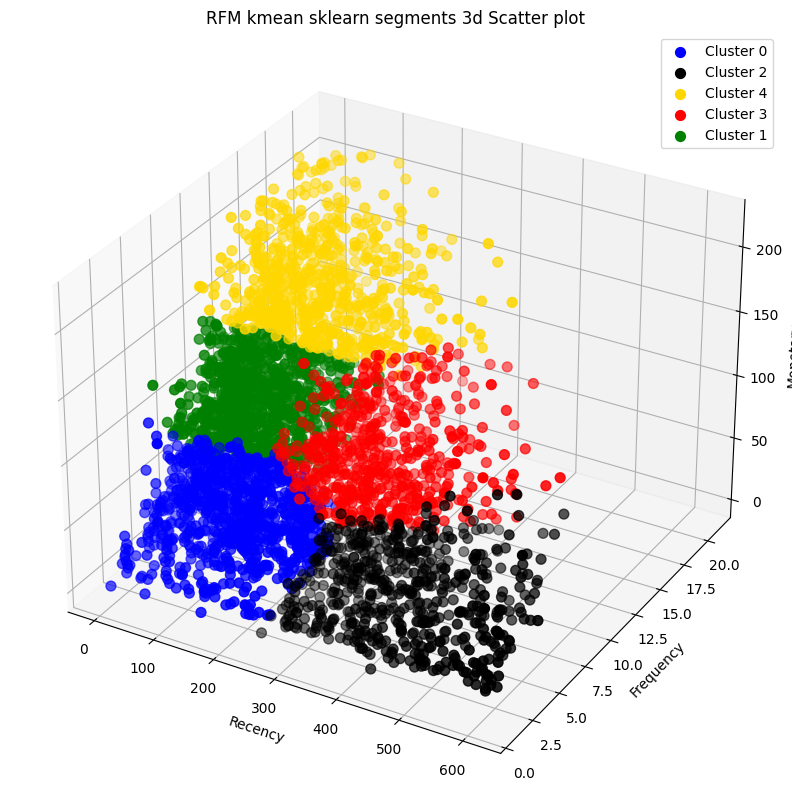

In [101]:
# Dữ liệu
x = df_kmean['Recency']
y = df_kmean['Frequency']
z = df_kmean['Monetary']
cluster_labels = df_kmean['Cluster']

# Tạo biểu đồ 3D Scatter plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Vẽ dữ liệu của từng cluster
for cluster in set(cluster_labels):
    ax.scatter(x[cluster_labels == cluster], y[cluster_labels == cluster], z[cluster_labels == cluster], label=f'{cluster}', s=50, color=colors_dict2[cluster])

# Đặt nhãn cho trục
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# Thêm chú thích
ax.legend()
plt.title('RFM kmean sklearn segments 3d Scatter plot')
# Hiển thị biểu đồ
plt.savefig('RFM kmean sklearn scatter 3d.png')
plt.show()

In [102]:
fig = px.scatter_3d(df_kmean, x='Recency', y='Frequency', z='Monetary',
                    color='Cluster', opacity = 0.7, title="RFM kmean sklearn segments 3D Scatter plot")
for level, color in colors_dict2.items():
    fig.update_traces(marker=dict(color=color), selector=dict(name=level))
fig.show()

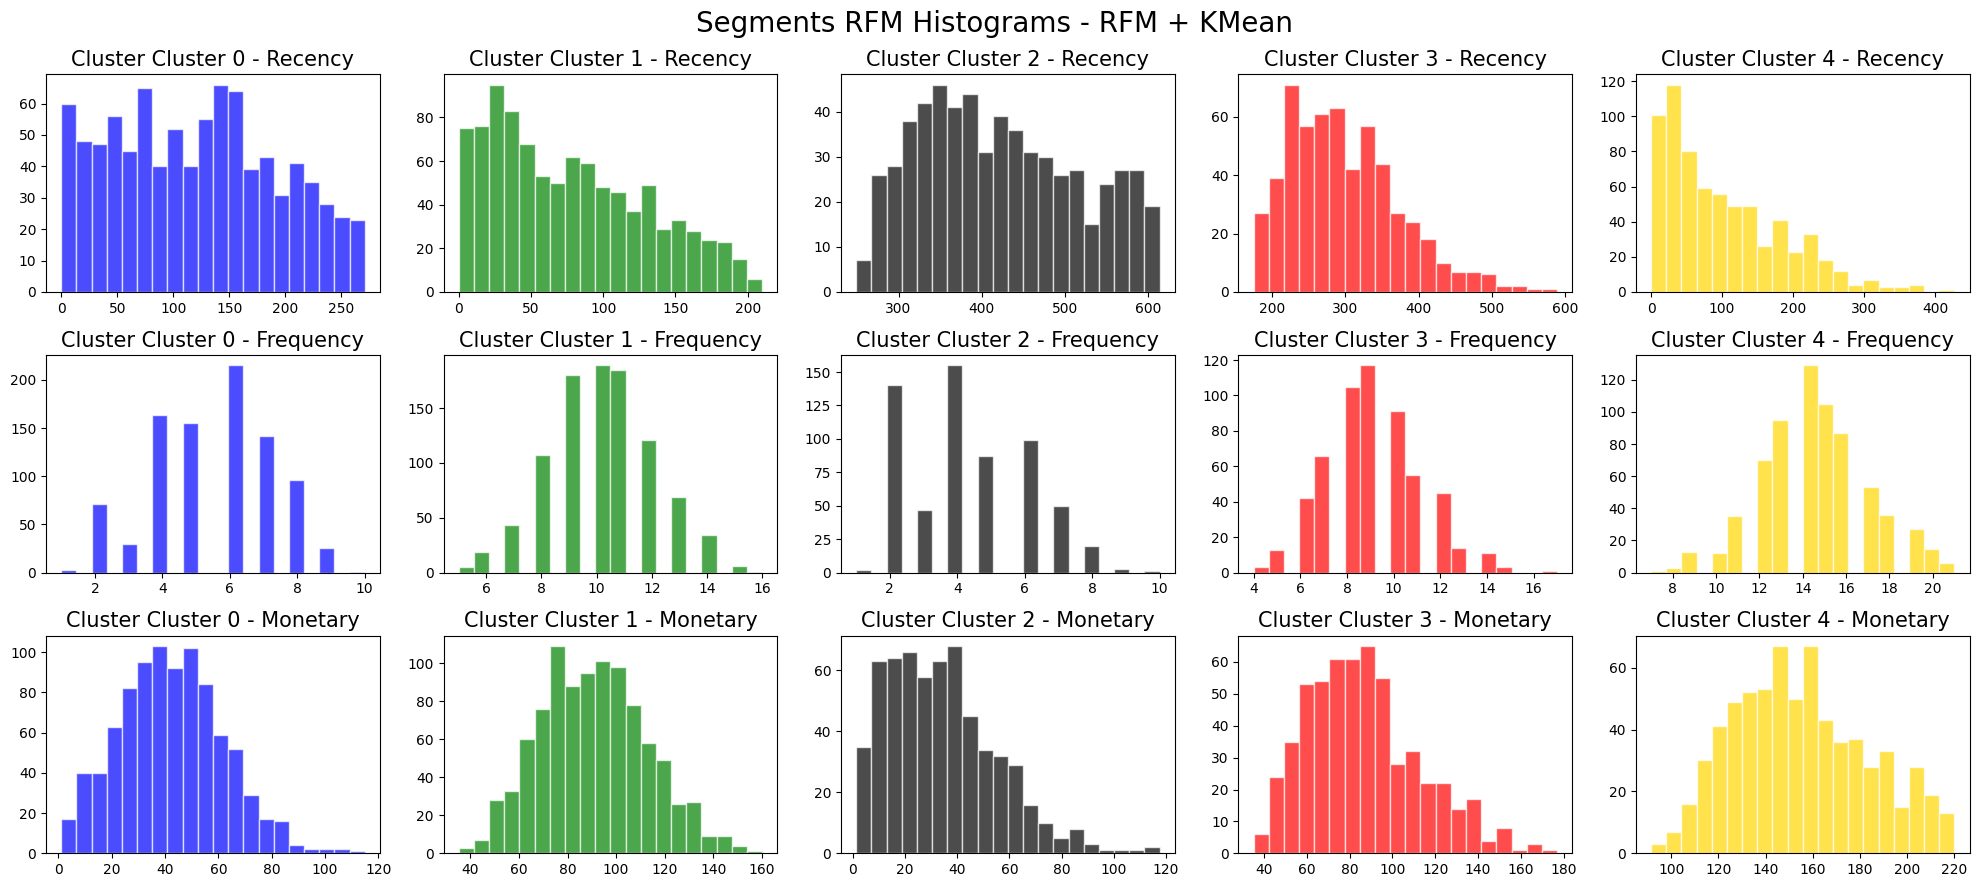

In [103]:
clusters = df_kmean['Cluster'].unique()
features = ['Recency', 'Frequency', 'Monetary']
clusters.sort()

# Setting up the subplots
n_rows = len(features)
n_cols = len(clusters)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))

for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = df_kmean[df_kmean['Cluster'] == cluster][feature]
        axes[i, j].hist(data, bins=20, color=colors[j], edgecolor='w', alpha=0.7)
        axes[i, j].set_title(f'Cluster {cluster} - {feature}', fontsize=15)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')
        # Add a title to the entire plot
plt.suptitle('Segments RFM Histograms - RFM + KMean', fontsize=20)

# Adjusting layout to prevent overlapping
plt.tight_layout()
plt.savefig('Histograms Segmented by RFM + KMeans.png')
plt.show()

In [104]:
s_kmean_grouped = df_kmean.groupby(by='Cluster')
s_kmean_grouped.describe().T

Cluster           Cluster 0   Cluster 1   Cluster 2   Cluster 3   Cluster 4
Recency   count  902.000000  959.000000  604.000000  566.000000  687.000000
          mean   120.500000   76.750782  422.135762  299.068905  101.959243
          std     72.850534   53.611564   95.253218   75.251982   82.855092
          min      0.000000    0.000000  249.000000  175.000000    0.000000
          25%     58.250000   31.000000  343.750000  239.250000   35.000000
          50%    121.000000   68.000000  412.500000  288.500000   82.000000
          75%    175.750000  118.000000  493.000000  343.000000  151.000000
          max    271.000000  210.000000  614.000000  589.000000  427.000000
Frequency count  902.000000  959.000000  604.000000  566.000000  687.000000
          mean     5.496674   10.189781    4.336093    9.075972   14.540029
          std      1.773992    1.886514    1.784758    2.066904    2.468061
          min      1.000000    5.000000    1.000000    4.000000    7.000000
          25%      4.000000    9.000000    3.000000    8.000000   13.000000
          50%      6.000000   10.000000    4.000000    9.000000   14.000000
          75%      7.000000   11.000000    6.000000   10.000000   16.000000
          max     10.000000   16.000000   10.000000   17.000000   21.000000
Monetary  count  902.000000  959.000000  604.000000  566.000000  687.000000
          mean    42.397373   90.670292   34.208675   86.509541  155.085517
          std     19.195148   21.922270   20.875029   26.387586   28.488109
          min      1.100000   35.200000    1.300000   35.100000   91.430000
          25%     28.600000   74.540000   17.400000   67.962500  133.700000
          50%     41.400000   89.600000   31.725000   83.330000  152.700000
          75%     55.107500  105.825000   46.457500  101.725000  175.495000
          max    114.900000  160.130000  117.500000  176.960000  220.040000

#### Summary

| Nhóm Phân Cụm | Số Lượng Khách Hàng | Recency (Ngày Gần Nhất) | Frequency (Tần Suất) | Monetary (Giá Trị) | Nhận xét |
|---------------|---------------------|-------------------------|----------------------|--------------------|----------------------|
| Cluster 0             | 902                 | 120.5 (0 - 271)         | 5.50 (1 - 10)        | 42.40 (1.10 - 114.90) | R cao, F và M thấp. Cần tăng cường hoạt động giao dịch và giá trị.              |
| Cluster 1             | 959                 | 76.75 (0 - 210)         | 10.19 (5 - 16)       | 90.67 (35.20 - 160.13) | R thấp, F và M ổn định. Cần duy trì và tăng cường mối quan hệ.               |
| Cluster 2             | 604                 | 422.14 (249 - 614)      | 4.34 (1 - 10)        | 34.21 (1.30 - 117.50) | R cao, F và M thấp. Cần tạo ra sự quan tâm và khuyến mãi.             |
| Cluster 3             | 566                 | 299.07 (175 - 589)      | 9.08 (4 - 17)        | 86.51 (35.10 - 176.96) | R cao, F và M ổn định. Cần tạo ra các chiến lược để kích thích sự quay lại.             |
| Cluster 4             | 687                 | 101.96 (0 - 427)        | 14.54 (7 - 21)       | 155.09 (91.43 - 220.04) | R cao, F và M cao. Cần tăng cường mối quan hệ và giá trị giao dịch.              |


##  phân cụm khách hàng theo RFM phối hợp với thuật toán phân cụm Hierarchical Clustering
- Dữ liệu đã được xử lý outlier

In [105]:
df_sch = df_filtered[['Recency','Frequency','Monetary']]

In [106]:
scaler2 = sdscale()

In [107]:
df_sch_scaled = scaler.fit_transform(df_sch[['Recency', 'Frequency', 'Monetary']])

In [108]:
Z = sch.linkage(df_sch_scaled, method='ward')

Vẽ dendrogram để xác định số cụm phù hợp

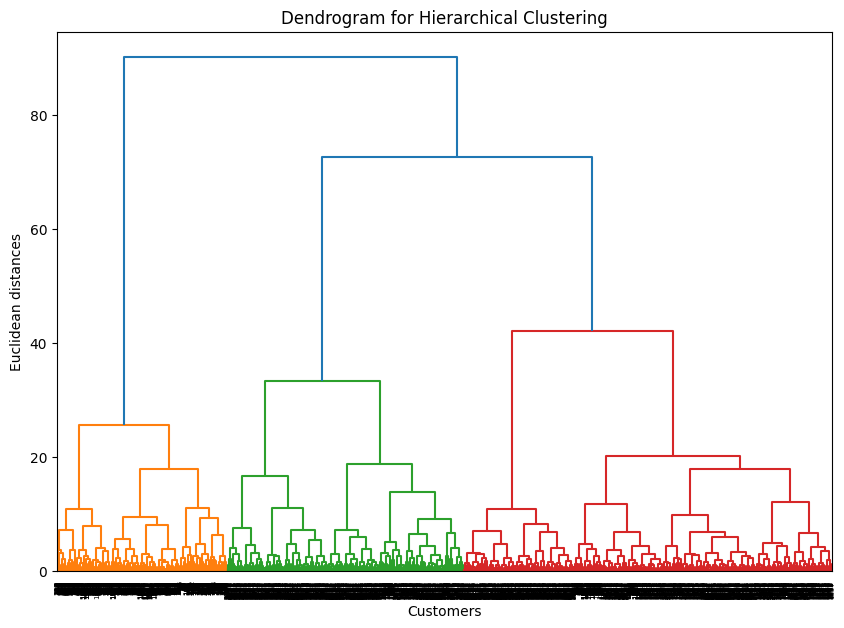

In [109]:
# Vẽ dendrogram để xác định số cụm phù hợp
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Dựa trên Dendrogram, ta chọn phân thành 5 clusters.

In [110]:
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')

In [111]:
hc.fit(df_sch_scaled)

AgglomerativeClustering(metric='euclidean', n_clusters=5)

In [112]:
print(hc.labels_)

[0 0 0 ... 4 4 3]


We can make a Dataframe with label and scatter plot the data again

In [113]:
df_sch['Cluster'] = hc.labels_

In [114]:
df_sch.head(10)

Recency  Frequency  Monetary  Cluster
Member_number                                       
1259                33         13    220.04        0
2738                51         17    220.00        0
1949               161         13    219.81        0
1090                70         11    219.20        0
1677                21         11    219.01        0
2779                 3         18    218.15        0
3495                42         18    217.85        0
4417               226         13    217.21        0
1522               371         15    216.20        0
2855                52         19    215.01        0

In [115]:
df_sch['Cluster'] = 'Cluster '+ df_sch['Cluster'].astype('str')
df_sch.head()

Recency  Frequency  Monetary    Cluster
Member_number                                         
1259                33         13    220.04  Cluster 0
2738                51         17    220.00  Cluster 0
1949               161         13    219.81  Cluster 0
1090                70         11    219.20  Cluster 0
1677                21         11    219.01  Cluster 0

In [116]:
df_sch.to_csv('RFM Hierarchical Clusteringsegments.csv')

In [117]:
# Calculate average values for each RFM_Level, and return a size of each segment
rfm_agg3 = df_sch.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(0)

rfm_agg3.columns = rfm_agg3.columns.droplevel()
rfm_agg3.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_agg3['Percent'] = round((rfm_agg3['Count']/rfm_agg3.Count.sum())*100, 2)

# Reset the index
rfm_agg3 = rfm_agg3.reset_index()

# Print the aggregated dataset
rfm_agg3

Cluster  RecencyMean  FrequencyMean  MonetaryMean  Count  Percent
0  Cluster 0        123.0           14.0         149.0    818    22.00
1  Cluster 1        313.0            7.0          65.0    651    17.51
2  Cluster 2         91.0           10.0          85.0   1235    33.22
3  Cluster 3         97.0            5.0          36.0    530    14.25
4  Cluster 4        429.0            4.0          27.0    484    13.02

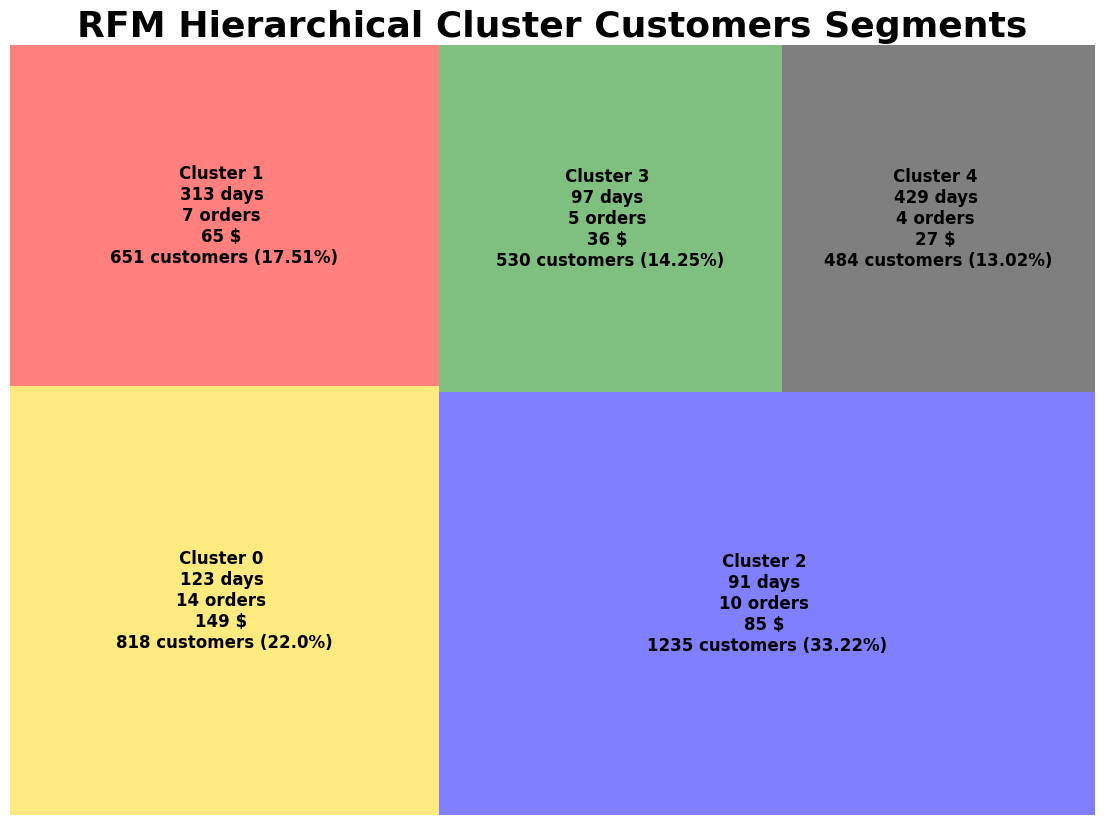

In [118]:

#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 10)

colors_dict3 = {'Cluster 0':'gold','Cluster 1':'red', 'Cluster 2':'blue',
               'Cluster 3':'green', 'Cluster 4':'black'}

colors = [colors_dict3[label] for label in rfm_agg3['Cluster']]

squarify.plot(sizes=rfm_agg3['Count'],
              text_kwargs={'fontsize':12,'weight':'bold', 'fontname':"sans serif"},
              color=colors_dict3.values(),
              label=['{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} customers ({}%)'.format(*rfm_agg3.iloc[i])
                      for i in range(0, len(rfm_agg3))], alpha=0.5 )


plt.title("RFM Hierarchical Cluster Customers Segments",fontsize=26,fontweight="bold")
plt.axis('off')

plt.savefig('RFM Hierarchical Cluster Unsupervised Segments.png')
plt.show()

In [119]:
fig = px.scatter(rfm_agg3, x="RecencyMean", y="MonetaryMean", size="FrequencyMean", color="Cluster",
           hover_name="Cluster", size_max=100, title="RFM Hierarchical Clustering segments 2D Scatter plot")
for level, color in colors_dict3.items():
    fig.update_traces(marker=dict(color=color), selector=dict(name=level))
fig.show()

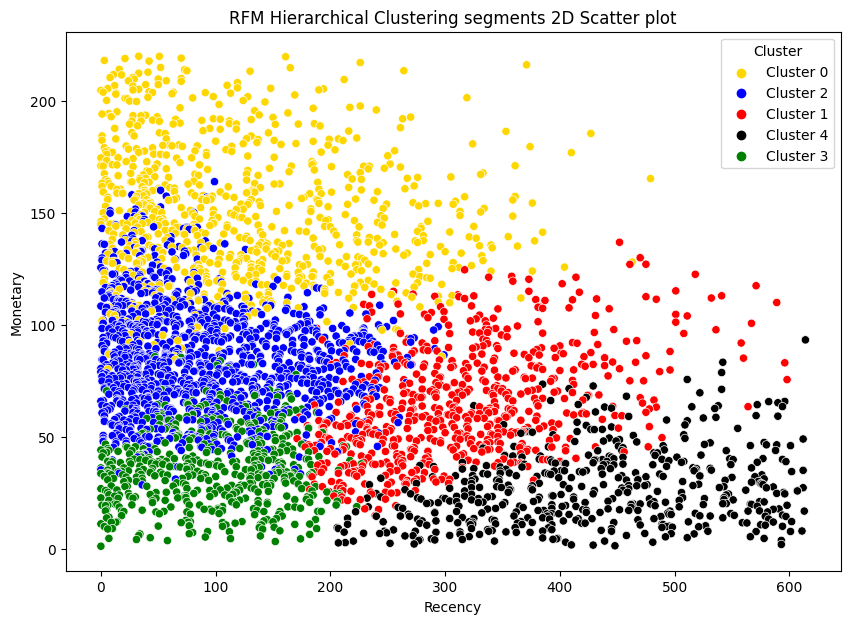

In [120]:
palette3 = [colors_dict3[key] for key in df_sch['Cluster'].unique()]
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_sch['Recency'], y=df_sch['Monetary'], hue=df_sch['Cluster'], palette=palette3)
plt.title('RFM Hierarchical Clustering segments 2D Scatter plot')
plt.xlabel('Recency')
plt.ylabel('Monetary')

plt.savefig('RFM Hierarchical Clustering scatter 2d.png')

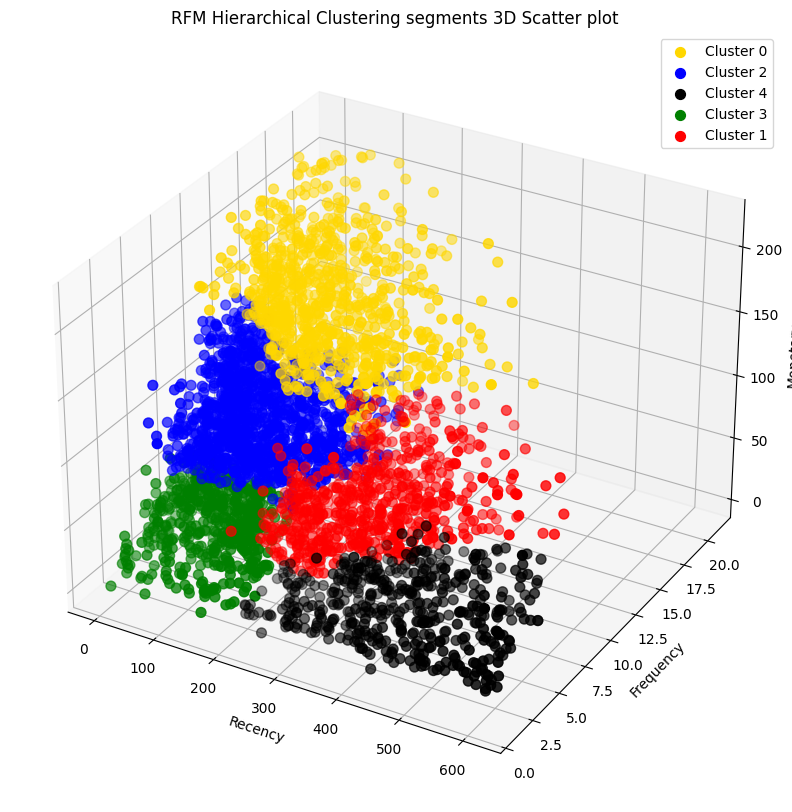

In [121]:
# Dữ liệu
x = df_sch['Recency']
y = df_sch['Frequency']
z = df_sch['Monetary']
cluster_labels = df_sch['Cluster']

# Tạo biểu đồ 3D Scatter plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Vẽ dữ liệu của từng cluster
for cluster in set(cluster_labels):
    ax.scatter(x[cluster_labels == cluster], y[cluster_labels == cluster], z[cluster_labels == cluster], label=cluster, s=50, color=colors_dict3[cluster])

# Đặt nhãn cho trục
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# Thêm chú thích
ax.legend()
plt.title('RFM Hierarchical Clustering segments 3D Scatter plot')

# Hiển thị biểu đồ
plt.savefig('RFM Hierarchical Clustering scatter 3d.png')
plt.show()

In [122]:
fig = px.scatter_3d(df_sch, x='Recency', y='Frequency', z='Monetary',
                    color='Cluster', opacity = 0.7, title="RFM Hierarchical Clustering segments 3D Scatter plot")
for level, color in colors_dict3.items():
    fig.update_traces(marker=dict(color=color), selector=dict(name=level))

fig.show()

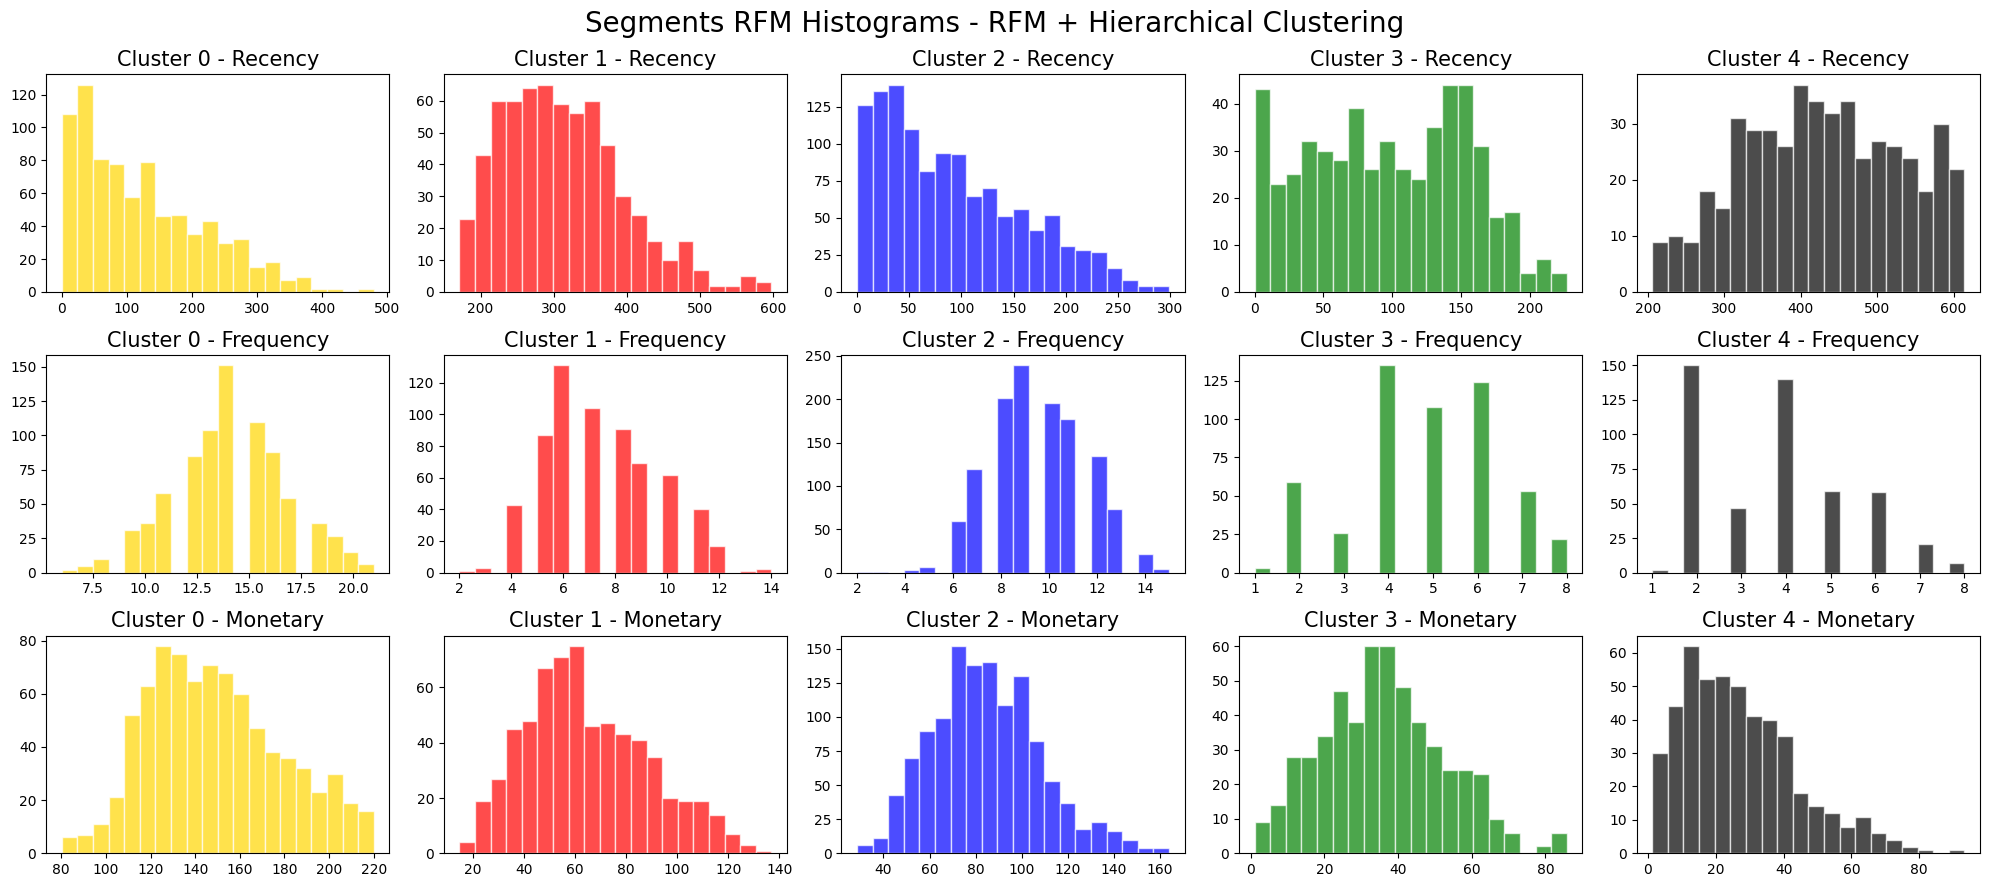

In [123]:
clusters = df_sch['Cluster'].unique()
features = ['Recency', 'Frequency', 'Monetary']
clusters.sort()

# Setting up the subplots
n_rows = len(features)
n_cols = len(clusters)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))

for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = df_sch[df_sch['Cluster'] == cluster][feature]
        axes[i, j].hist(data, bins=20, color=colors[j], edgecolor='w', alpha=0.7)
        axes[i, j].set_title(f'{cluster} - {feature}', fontsize=15)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')
        # Add a title to the entire plot
plt.suptitle('Segments RFM Histograms - RFM + Hierarchical Clustering', fontsize=20)

# Adjusting layout to prevent overlapping
plt.tight_layout()
plt.savefig('Histograms Segmented by RFM + Hierarchical Clustering.png')
plt.show()

In [124]:
hc_grouped = df_sch.groupby(by='Cluster')
hc_grouped.describe().T

Cluster           Cluster 0   Cluster 1    Cluster 2   Cluster 3   Cluster 4
Recency   count  818.000000  651.000000  1235.000000  530.000000  484.000000
          mean   123.436430  312.878648    91.417004   97.226415  428.716942
          std     96.636058   82.603850    68.040472   56.645297  102.792603
          min      0.000000  171.000000     0.000000    0.000000  206.000000
          25%     41.000000  249.000000    33.000000   49.000000  348.750000
          50%    103.000000  304.000000    77.000000   97.500000  429.000000
          75%    187.500000  362.000000   137.000000  143.750000  511.000000
          max    479.000000  598.000000   299.000000  227.000000  614.000000
Frequency count  818.000000  651.000000  1235.000000  530.000000  484.000000
          mean    14.001222    7.351767     9.568421    4.849057    3.820248
          std      2.728650    2.142050     2.017141    1.591521    1.603155
          min      6.000000    2.000000     2.000000    1.000000    1.000000
          25%     12.000000    6.000000     8.000000    4.000000    2.000000
          50%     14.000000    7.000000     9.000000    5.000000    4.000000
          75%     16.000000    9.000000    11.000000    6.000000    5.000000
          max     21.000000   14.000000    15.000000    8.000000    8.000000
Monetary  count  818.000000  651.000000  1235.000000  530.000000  484.000000
          mean   149.312213   64.890369    84.778097   36.241415   27.015517
          std     30.018657   23.958621    23.480624   16.709621   16.774650
          min     80.210000   14.800000    28.500000    1.100000    1.300000
          25%    126.575000   47.075000    68.550000   23.925000   13.800000
          50%    145.510000   61.200000    83.010000   35.550000   24.350000
          75%    169.920000   81.600000    99.465000   46.777500   37.125000
          max    220.040000  136.910000   164.000000   85.800000   93.300000

### Tổng kết các cụm Hierarchical Clustering

| Hierarchy Cluster | Số Lượng | Recency (Ngày Gần Nhất) | Frequency (Tần Suất) | Monetary (Giá Trị) | Nhận xét |
|-------------------|---------------------|-------------------------|----------------------|--------------------|----------------------|
| 0                 | 818               | 123.44 (0 - 479)      | 14 (6 - 21)        | 149.31 (80.21 - 220.04)  | R thấp đến cao, F thấp đến cao và M trên TB. Cần tái kích hoạt.|
| 1                 | 651                | 312.87 (171 - 598)      | 7.35 (2 - 14)        | 64.89 (14.8 - 136.91) | R rất cao, F và M từ thấp đến trung bình. Cần duy trì và tăng cường mối quan hệ. |
| 2                 | 1235                 | 91.42 (0 - 299)         | 9.57 (2 - 15)       | 84.78 (28.5 - 164) | R thấp, F và M từ thấp đến trung bình. Cần tạo ra sự quan tâm và khuyến mãi.|
| 3                 | 530                | 97.23 (0 - 227)      | 4.85 (1 - 8)        | 36.24 (1.1 - 85.8)  | R cao, F và M thấp. Cần có các chiến lược để kích thích sự quay lại. |
| 4                 | 484                | 428.72 (206 - 614)          | 3.82 (1 - 8)        | 27.02 (1.3 - 93.3)  | R rất cao, F và M thấp. Cần tăng cường mối quan hệ và giá trị giao dịch. |

### Nhận xét:

1. **Cluster 0**: Khách hàng này có giá trị cao nhưng có sự biến thiên lớn về thời gian mua hàng. Cần có chiến dịch tái kích hoạt họ.

2. **Cluster 1**: Khách hàng này cần được duy trì và tăng cường mối quan hệ, có thể là qua việc cung cấp ưu đãi đặc biệt.

3. **Cluster 2**: Khách hàng này cần sự quan tâm và các khuyến mãi để giữ họ tiếp tục mua hàng.

4. **Cluster 3**: Khách hàng này cần các chiến lược kích thích sự quay lại, như gửi email nhắc nhở hoặc cung cấp ưu đãi.

5. **Cluster 4**: Khách hàng này cần chiến dịch tăng cường mối quan hệ và giá trị giao dịch, có thể qua việc gửi các gói khuyến mãi hoặc ưu đãi đặc biệt.

## Xây dựng model phân cụm khách hàng theo RFM phối hợp với thuật toán phân cụm Kmeans (pyspark)

In [125]:
spark = SparkSession.builder.appName('kmeans').getOrCreate()
spark

In [126]:
df_spark = spark.createDataFrame(df_filtered)

In [127]:
df_spark.printSchema()

root
 |-- Recency: long (nullable = true)
 |-- Frequency: long (nullable = true)
 |-- Monetary: double (nullable = true)
 |-- R: long (nullable = true)
 |-- F: long (nullable = true)
 |-- M: long (nullable = true)
 |-- RFM_Segment: string (nullable = true)
 |-- RFM_Score: long (nullable = true)



In [128]:
df_spark.show(3)

+-------+---------+--------+---+---+---+-----------+---------+
|Recency|Frequency|Monetary|  R|  F|  M|RFM_Segment|RFM_Score|
+-------+---------+--------+---+---+---+-----------+---------+
|     33|       13|  220.04|  4|  4|  4|        444|       12|
|     51|       17|   220.0|  4|  4|  4|        444|       12|
|    161|       13|  219.81|  2|  4|  4|        244|       10|
+-------+---------+--------+---+---+---+-----------+---------+
only showing top 3 rows



In [129]:
df_spark = df_spark.select(['Recency', 'Frequency', 'Monetary'])

In [130]:
df_spark.show(3)

+-------+---------+--------+
|Recency|Frequency|Monetary|
+-------+---------+--------+
|     33|       13|  220.04|
|     51|       17|   220.0|
|    161|       13|  219.81|
+-------+---------+--------+
only showing top 3 rows



## Spark Formatting of Data

In [131]:
df_spark.columns

['Recency', 'Frequency', 'Monetary']

In [132]:
assembler = VectorAssembler(inputCols = df_spark.columns,
                            outputCol='features')

In [133]:
final_data = assembler.transform(df_spark)

## Scale the Data

In [134]:
scaler3 = StandardScaler(inputCol="features",
                        outputCol="scaledFeatures",
                        withStd=True,
                        withMean=False)

In [135]:
# Compute summary statistics by fitting the StandardScaler
scalerModel = scaler3.fit(final_data)

In [136]:
# Normalize each feature to have unit standard deviation.
final_data = scalerModel.transform(final_data)

In [137]:
final_data.show(3, False)

+-------+---------+--------+-------------------+---------------------------------------------------------+
|Recency|Frequency|Monetary|features           |scaledFeatures                                           |
+-------+---------+--------+-------------------+---------------------------------------------------------+
|33     |13       |220.04  |[33.0,13.0,220.04] |[0.22226285551555755,3.205072823835453,4.588070787631543]|
|51     |17       |220.0   |[51.0,17.0,220.0]  |[0.3434971403422253,4.191249077323285,4.587236744587073] |
|161    |13       |219.81  |[161.0,13.0,219.81]|[1.0843733253940837,3.205072823835453,4.583275040125838] |
+-------+---------+--------+-------------------+---------------------------------------------------------+
only showing top 3 rows



## Train the Model and Evaluate

### Seleck k with minimun WSSSE: k between 2 - 10

In [138]:
# Create an evaluator
evaluator = ClusteringEvaluator()
# Trains a k-means model.
k_list = []
wssse_list = []
wssse_str = ""
silhouette_list = []
sil_str = ""



for k in range(2,11):
    k_list.append(k)

    kmeans = KMeans(featuresCol='scaledFeatures',k=k)
    model = kmeans.fit(final_data)

    wssse = model.summary.trainingCost
    wssse_list.append(wssse)
    wssse_str = wssse_str + "With k =" + str(k) + " - WSSSE = " + str(wssse) + "\n"

    # silhoutte
    predictions = model.transform(final_data)

    # Evaluate clustering by computing Silhouette score
    evaluator = ClusteringEvaluator()
    silhouette = evaluator.evaluate(predictions)
    silhouette_list.append(silhouette)

    sil_str = sil_str + "With k =" + str(k) + " - Silhouette = " + str(silhouette) + "\n"

In [139]:
print(wssse_str)

With k =2 - WSSSE = 5975.040028896736
With k =3 - WSSSE = 4039.2793505005725
With k =4 - WSSSE = 3415.7023543196665
With k =5 - WSSSE = 2717.674491335317
With k =6 - WSSSE = 2456.9041759834085
With k =7 - WSSSE = 2169.3516936732753
With k =8 - WSSSE = 1993.210782739342
With k =9 - WSSSE = 1848.7287510002895
With k =10 - WSSSE = 1724.5728063528677



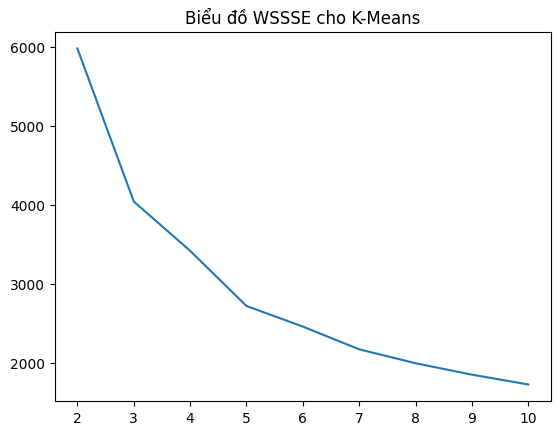

In [140]:
plt.plot(k_list, wssse_list)
plt.title('Biểu đồ WSSSE cho K-Means')
plt.savefig('spark_kmean_wssse.png')
plt.show()

In [141]:
print(sil_str)

With k =2 - Silhouette = 0.2605661157358081
With k =3 - Silhouette = 0.35063374446081563
With k =4 - Silhouette = 0.27970827663674586
With k =5 - Silhouette = 0.1568197195011989
With k =6 - Silhouette = 0.20492557410373596
With k =7 - Silhouette = 0.08139314878875711
With k =8 - Silhouette = 0.13577344977055633
With k =9 - Silhouette = 0.11721120114568606
With k =10 - Silhouette = 0.09025586427526266



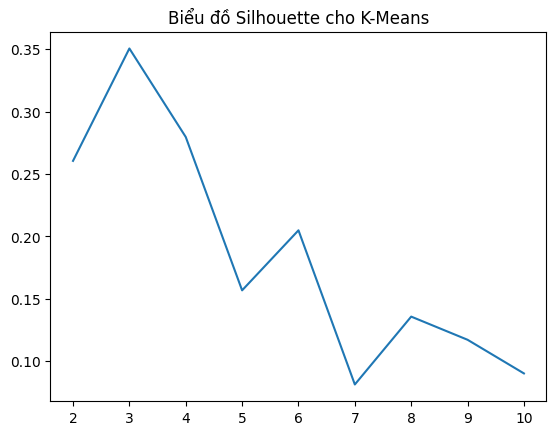

In [142]:
plt.plot(k_list, silhouette_list)
plt.title('Biểu đồ Silhouette cho K-Means')
plt.savefig('spark_kmean_silhouette.png')
plt.show()

- According to Elbow Method and silhouette score, we choose k = 5

### Select k = 5

In [143]:
# Trains a k-means model.
kmeans = KMeans(featuresCol='scaledFeatures',k=5, predictionCol='Cluster')
model = kmeans.fit(final_data)

In [144]:
# Evaluate clustering by computing Within Set Sum of Squared Errors.
wssse = model.summary.trainingCost
print("Within Set Sum of Squared Errors = " + str(wssse))

Within Set Sum of Squared Errors = 2717.6744913353173


In [145]:
# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[2.83786665 1.06162368 0.69963171]
[0.52164314 2.51209789 1.89328181]
[0.69007269 3.58655221 3.23230711]
[0.81065056 1.35612917 0.8848315 ]
[2.03717705 2.2241329  1.79961431]


In [146]:
predictions = model.transform(final_data)

In [147]:
predictions.select("Cluster").show(5)

+-------+
|Cluster|
+-------+
|      2|
|      2|
|      2|
|      2|
|      2|
+-------+
only showing top 5 rows



In [148]:
# Check number points of each cluster

In [149]:
predictions.groupBy('Cluster').count().show()

+-------+-----+
|Cluster|count|
+-------+-----+
|      1|  966|
|      4|  565|
|      2|  688|
|      3|  901|
|      0|  598|
+-------+-----+



In [150]:
data_result = predictions.select("Cluster")
data_result.columns

['Cluster']

In [151]:
type(data_result)

pyspark.sql.dataframe.DataFrame

In [152]:
final_data.show(3, False)

+-------+---------+--------+-------------------+---------------------------------------------------------+
|Recency|Frequency|Monetary|features           |scaledFeatures                                           |
+-------+---------+--------+-------------------+---------------------------------------------------------+
|33     |13       |220.04  |[33.0,13.0,220.04] |[0.22226285551555755,3.205072823835453,4.588070787631543]|
|51     |17       |220.0   |[51.0,17.0,220.0]  |[0.3434971403422253,4.191249077323285,4.587236744587073] |
|161    |13       |219.81  |[161.0,13.0,219.81]|[1.0843733253940837,3.205072823835453,4.583275040125838] |
+-------+---------+--------+-------------------+---------------------------------------------------------+
only showing top 3 rows



In [153]:
temp = final_data.select(['Recency', 'Frequency', 'Monetary'])

In [154]:
temp.show(3)

+-------+---------+--------+
|Recency|Frequency|Monetary|
+-------+---------+--------+
|     33|       13|  220.04|
|     51|       17|   220.0|
|    161|       13|  219.81|
+-------+---------+--------+
only showing top 3 rows



In [155]:
# since there is no common column between these two dataframes add row_index so t
temp=temp.withColumn('row_index', f.monotonically_increasing_id())
data_result=data_result.withColumn('row_index', f.monotonically_increasing_id())
temp = temp.join(data_result, on=["row_index"]).sort("row_index").drop("row_index")

In [156]:
temp.show(3)

+-------+---------+--------+-------+
|Recency|Frequency|Monetary|Cluster|
+-------+---------+--------+-------+
|     33|       13|  220.04|      2|
|     51|       17|   220.0|      2|
|    161|       13|  219.81|      2|
+-------+---------+--------+-------+
only showing top 3 rows



In [157]:
df_spark_kmean = temp.toPandas()

In [158]:
df_spark_kmean['Cluster'] = 'Cluster '+ df_spark_kmean['Cluster'].astype('str')
df_spark_kmean.head(3)

Recency  Frequency  Monetary    Cluster
0       33         13    220.04  Cluster 2
1       51         17    220.00  Cluster 2
2      161         13    219.81  Cluster 2

In [159]:
df_spark_kmean.to_csv('kmean_pySpark_segments.csv')

In [160]:
kmean_spark_agg = df_spark_kmean.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(0)

kmean_spark_agg.columns = kmean_spark_agg.columns.droplevel()
kmean_spark_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
kmean_spark_agg['Percent'] = round((kmean_spark_agg['Count']/kmean_spark_agg.Count.sum())*100, 2)

# Reset the index
kmean_spark_agg = kmean_spark_agg.reset_index()

# Print the aggregated dataset
kmean_spark_agg

Cluster  RecencyMean  FrequencyMean  MonetaryMean  Count  Percent
0  Cluster 0        421.0            4.0          34.0    598    16.08
1  Cluster 1         77.0           10.0          91.0    966    25.98
2  Cluster 2        102.0           15.0         155.0    688    18.50
3  Cluster 3        120.0            6.0          42.0    901    24.23
4  Cluster 4        302.0            9.0          86.0    565    15.20

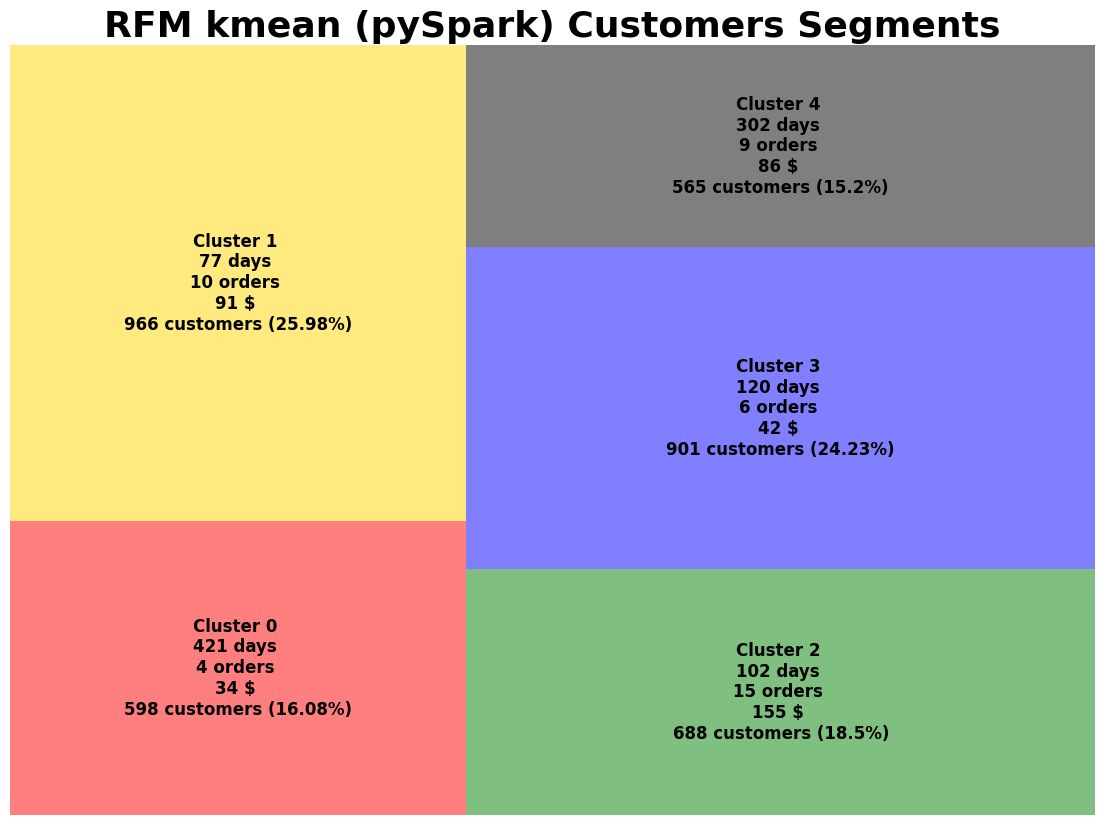

In [161]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 10)

colors_dict4 = {'Cluster 0':'red','Cluster 1':'gold', 'Cluster 2':'green',
               'Cluster 3':'blue', 'Cluster 4':'black'}

colors = [colors_dict4[label] for label in kmean_spark_agg['Cluster']]

squarify.plot(sizes=kmean_spark_agg['Count'],
              text_kwargs={'fontsize':12,'weight':'bold', 'fontname':"sans serif"},
              color=colors_dict4.values(),
              label=['{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} customers ({}%)'.format(*kmean_spark_agg.iloc[i])
                      for i in range(0, len(kmean_spark_agg))], alpha=0.5 )


plt.title("RFM kmean (pySpark) Customers Segments",fontsize=26,fontweight="bold")
plt.axis('off')

plt.savefig('Spark kmean Unsupervised Segments.png')
plt.show()

In [162]:
Spark_grouped = df_spark_kmean.groupby(by='Cluster')
Spark_grouped.describe().T

Cluster           Cluster 0   Cluster 1   Cluster 2   Cluster 3   Cluster 4
Recency   count  598.000000  966.000000  688.000000  901.000000  565.000000
          mean   421.346154   77.427536  102.452035  120.359600  302.465487
          std     95.540018   54.233027   83.055973   72.768793   77.052766
          min    247.000000    0.000000    0.000000    0.000000  175.000000
          25%    343.000000   31.000000   35.000000   58.000000  242.000000
          50%    411.500000   68.000000   82.000000  121.000000  291.000000
          75%    493.000000  118.000000  151.250000  175.000000  346.000000
          max    614.000000  211.000000  427.000000  271.000000  589.000000
Frequency count  598.000000  966.000000  688.000000  901.000000  565.000000
          mean     4.306020   10.191511   14.537791    5.500555    9.021239
          std      1.772202    1.883545    2.466373    1.771142    2.076440
          min      1.000000    5.000000    7.000000    1.000000    4.000000
          25%      3.000000    9.000000   13.000000    4.000000    8.000000
          50%      4.000000   10.000000   14.000000    6.000000    9.000000
          75%      6.000000   11.000000   16.000000    7.000000   10.000000
          max      9.000000   16.000000   21.000000   10.000000   17.000000
Monetary  count  598.000000  966.000000  688.000000  901.000000  565.000000
          mean    33.553746   90.724420  155.031773   42.435771   86.307982
          std     20.005307   21.960765   28.497635   19.171115   26.371678
          min      1.300000   35.200000   91.430000    1.100000   35.100000
          25%     17.132500   74.605000  133.367500   28.600000   67.780000
          50%     31.155000   89.630000  152.625000   41.400000   83.120000
          75%     45.952500  105.837500  175.467500   55.110000  101.800000
          max    104.000000  160.130000  220.040000  114.900000  176.960000

### Tổng kết phân nhóm khách hàng theo Kmeans (pySpark)

| Nhóm | Số Lượng  | Recency (Ngày Gần Nhất) | Frequency (Tần Suất) | Monetary (Giá Trị) | Mô tả |
|---------------|---------------------|-------------------------|----------------------|--------------------|----------------------|
| 0             | 958                 | 74.33 (0 - 201)         | 10.09 (4 - 15)       | 89.89 (28.50 - 160.13) | R thấp F và M trung bình thấp. Cần tăng cường hoạt động giao dịch.|
| 1             | 679                 | 98.48 (0 - 427)         | 14.58 (7 - 21)       | 155.05 (85.45 - 220.04) | R thấp đến trung bình, F và M trung bình đến cao. Có tiềm năng để duy trì và tăng cường mối quan hệ.  |
| 2             | 899                 | 124.48 (0 - 279)        | 5.45 (1 - 9)         | 42.10 (1.10 - 114.90) | R thấp, F và M thấp. Cần tạo ra sự quan tâm và khuyến mãi.|
| 3             | 567                 | 295.19 (175 - 589)      | 9.38 (4 - 17)        | 89.15 (35.10 - 176.96) | R trung bình cao, F và M trung bình. Cần tạo ra các chiến lược để kích thích sự quay lại. |
| 4             | 615                 | 421.50 (252 - 614)      | 4.39 (1 - 10)        | 35.08 (1.30 - 117.50) | R trung bình đến cao nhất, F trung bình thấp và M thấp đến trung bình cao. Cần tăng cường mối quan hệ và giá trị giao dịch.|


### Nhận xét: Phân khúc theo tần suất và giá trị khá, nhưng ngày gần nhất mua sắm phân không cụ thể ở vài nhóm

In [163]:
fig = px.scatter(kmean_spark_agg, x="RecencyMean", y="MonetaryMean", size="FrequencyMean", color="Cluster",
           hover_name="Cluster", size_max=100, title="RFM kmean pySpark segments 2D Scatter plot")
for level, color in colors_dict4.items():
    fig.update_traces(marker=dict(color=color), selector=dict(name=level))

fig.show()

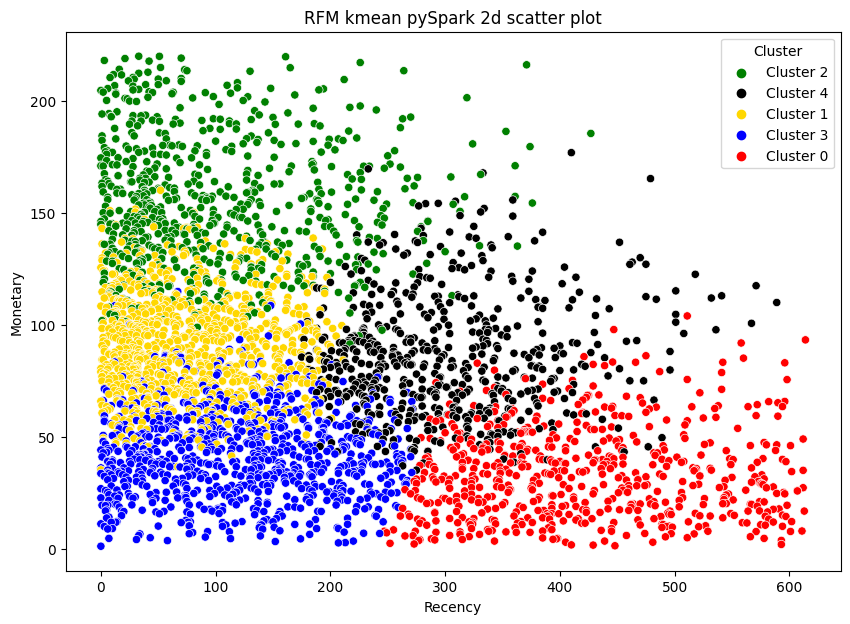

In [164]:
palette4 = [colors_dict4[key] for key in df_spark_kmean['Cluster'].unique()]
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_spark_kmean['Recency'], y=df_spark_kmean['Monetary'], hue=df_spark_kmean['Cluster'], palette=palette4)
plt.title('RFM kmean pySpark 2d scatter plot')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.savefig('RFM kmean pySpark scatter 2d.png')

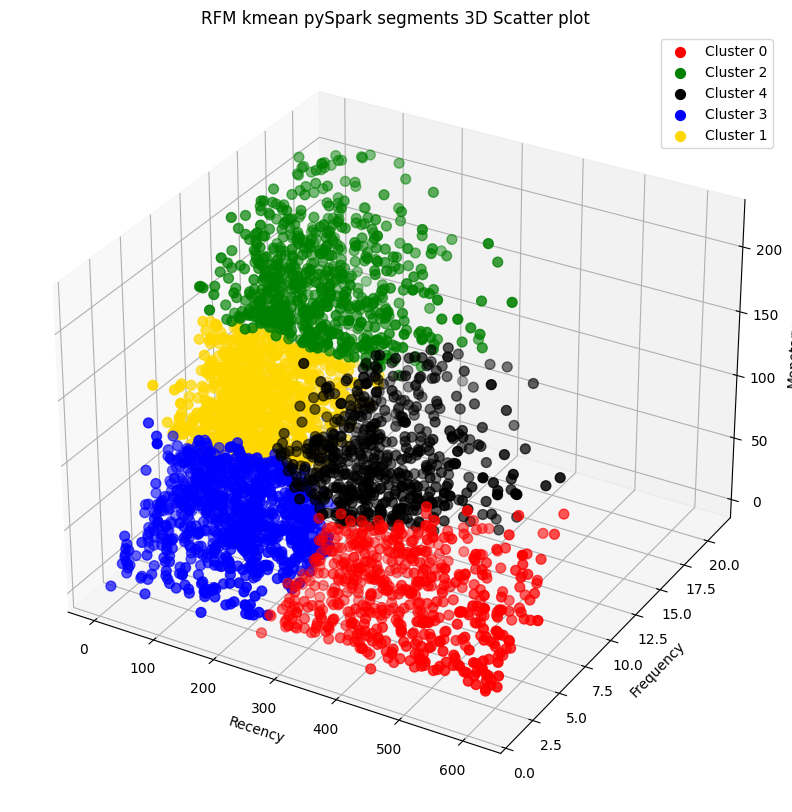

In [165]:
# Dữ liệu
x = df_spark_kmean['Recency']
y = df_spark_kmean['Frequency']
z = df_spark_kmean['Monetary']
cluster_labels = df_spark_kmean['Cluster']

# Tạo biểu đồ 3D Scatter plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Vẽ dữ liệu của từng cluster
for cluster in set(cluster_labels):
    ax.scatter(x[cluster_labels == cluster], y[cluster_labels == cluster], z[cluster_labels == cluster], label=f'{cluster}', s=50, color=colors_dict4[cluster])

# Đặt nhãn cho trục
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# Thêm chú thích
ax.legend()
plt.title('RFM kmean pySpark segments 3D Scatter plot')
# Hiển thị biểu đồ
plt.savefig('RFM kmean pySpark scatter 3d.png')
plt.show()

In [166]:
fig = px.scatter_3d(df_spark_kmean, x='Recency', y='Frequency', z='Monetary',
                    color='Cluster', opacity = 0.7, title="RFM kmean pySpark segments 3D Scatter plot")
for level, color in colors_dict4.items():
    fig.update_traces(marker=dict(color=color), selector=dict(name=level))
fig.show()

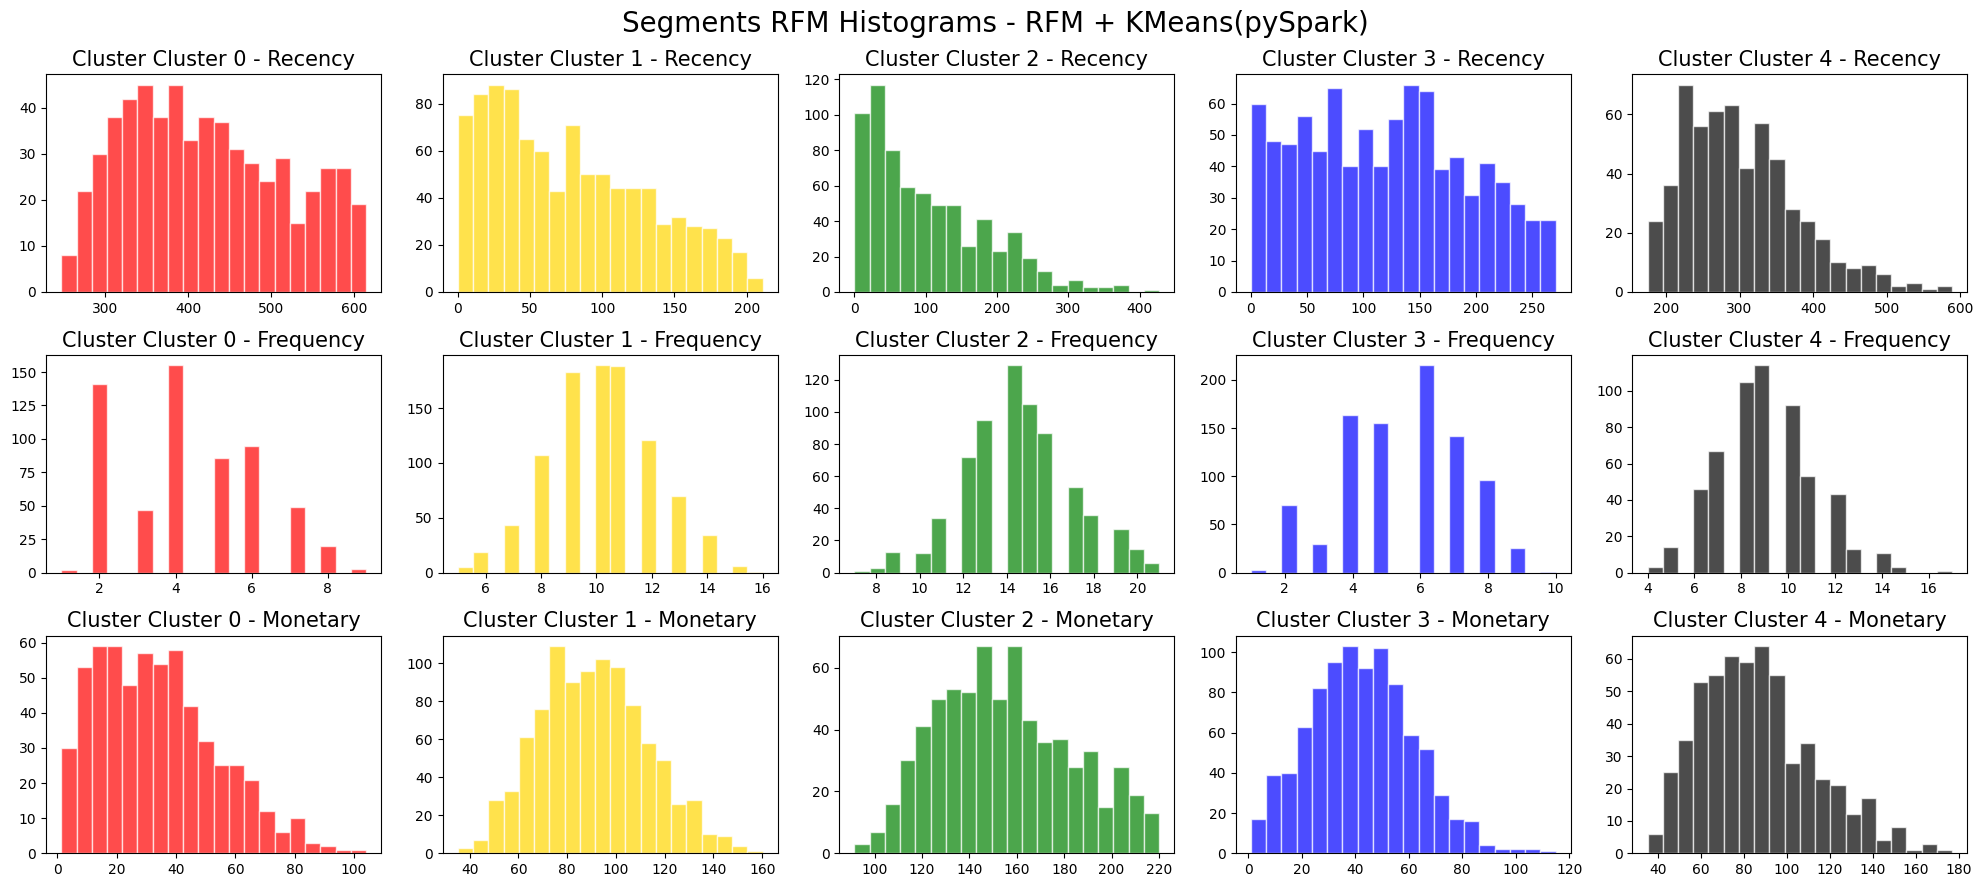

In [167]:
clusters = df_spark_kmean['Cluster'].unique()
features = ['Recency', 'Frequency', 'Monetary']
clusters.sort()

# Setting up the subplots
n_rows = len(features)
n_cols = len(clusters)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))

for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = df_spark_kmean[df_spark_kmean['Cluster'] == cluster][feature]
        axes[i, j].hist(data, bins=20, color=colors[j], edgecolor='w', alpha=0.7)
        axes[i, j].set_title(f'Cluster {cluster} - {feature}', fontsize=15)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')
        # Add a title to the entire plot
plt.suptitle('Segments RFM Histograms - RFM + KMeans(pySpark)', fontsize=20)

# Adjusting layout to prevent overlapping
plt.tight_layout()
plt.savefig('Histograms Segmented by RFM + KMeans(pySpark).png')
plt.show()

## Đánh giá và report các kết quả

Các Phương Pháp Phân Cụm
### Tập Luật - RFM Level Function:

#### Ưu điểm:
- Rõ ràng và dễ hiểu: Các quy tắc phân loại khách hàng rất cụ thể và dễ hiểu.
- Dễ triển khai: Chỉ cần kiểm tra các điều kiện và phân loại khách hàng vào các nhóm tương ứng.
- Hấp thụ kinh nghiệm các mô hình kinh doanh đã có: Các quy tắc này có thể dựa trên các hiểu biết trước đó về khách hàng.
#### Nhược điểm:
- Không linh hoạt: Các nhóm được xác định trước không thay đổi được và không thể học từ dữ liệu mới.
- Không khám phá được các mẫu ẩn: Không phát hiện được các nhóm khách hàng mới hoặc mẫu hành vi không mong đợi.
- Độ phức tạp tăng theo số quy tắc: Nếu số lượng quy tắc tăng lên, việc kiểm tra các điều kiện sẽ phức tạp hơn.

### K-means Clustering

#### Ưu điểm:
- Đơn giản và nhanh chóng: Dễ hiểu, dễ triển khai và tính toán nhanh.
- Linh hoạt: Có thể điều chỉnh số lượng cụm (K) để phù hợp với dữ liệu.
#### Nhược điểm:
- Khó để chọn K tối ưu.
- Nhạy cảm với giá trị ngoại lệ và cụm không đồng đều: Hiệu quả kém với các cụm có hình dạng phức tạp hoặc kích thước không đồng đều.
- Hiệu quả giảm dần đến khi thể chạy nổi khi tập dữ liệu lớn dần đến rất lớn

### Hierarchical Clustering:

#### Ưu điểm:
- Không cần xác định trước số lượng cụm: Tạo ra cây phân cấp (dendrogram) giúp hiểu rõ hơn về cấu trúc phân cụm.
- Phát hiện các cụm có hình dạng phức tạp: Tốt cho việc phân tích các mối quan hệ phân cấp trong dữ liệu.
#### Nhược điểm:
- Không phù hợp với dữ liệu lớn: Tốn thời gian tính toán và khó mở rộng.
- Khó điều chỉnh: Phân cấp tạo ra không dễ dàng điều chỉnh khi có thêm dữ liệu mới.

### K-means Clustering

#### Ưu điểm:
- Đơn giản và nhanh chóng: Dễ hiểu, dễ triển khai và tính toán nhanh.
- Hiệu suất cao trên big data
- Linh hoạt: Có thể điều chỉnh số lượng cụm (K) để phù hợp với dữ liệu.
#### Nhược điểm:
- Khó để chọn K tối ưu.
- Nhạy cảm với giá trị ngoại lệ và cụm không đồng đều: Hiệu quả kém với các cụm có hình dạng phức tạp hoặc kích thước không đồng đều.
- Chạy hiệu suất kém trên dữ liệu nhỏ


# Kết luận:

Với quy mô cửa hàng bán lẻ, để khai thác có hiệu quả tối đa và tiết kiệm nguồn nhân lực và ngân sách, ta có thể ưu tiên dùng RFM_level để phân cụm khách hàng để xác định nhóm khách hàng theo kinh nghiệm thành công sẵn có trong nghề, sau đó có những chương trình quảng cáo, ưu đãi và tăng thêm những dịch vụ khách hàng cho từng nhóm khách hàng một cách thích hợp, thích hợp ưu tiên cho những nhóm khách hàng có tỷ suất hiệu quả cao.

# Bước 6: Deployment & Feedback/ Act

# Tinh chỉnh mô hình và deploy app

In [17]:
# Create labels for Recency, Frequency, Monetary
r_labels = range(4, 0, -1) # số ngày tính từ lần cuối mua hàng lớn thì gán nhãn nhỏ, ngược lại thì nhãn lớn
f_labels = range(1, 5)
m_labels = range(1, 5)

In [18]:
quantiles = df_filtered.quantile(q=[0.25,0.5,0.75])

In [19]:
quantiles

Recency  Frequency  Monetary
0.25     58.0        6.0    43.900
0.50    142.0        8.0    73.905
0.75    275.0       11.0   111.300

In [20]:
quantiles = quantiles[['Recency', 'Frequency', 'Monetary']].to_dict()

In [21]:
quantiles 

{'Recency': {0.25: 58.0, 0.5: 142.0, 0.75: 275.0},
 'Frequency': {0.25: 6.0, 0.5: 8.0, 0.75: 11.0},
 'Monetary': {0.25: 43.9, 0.5: 73.905, 0.75: 111.3}}

In [248]:
def assign_labels(df, quantiles):
    # Assign labels to Recency
    r_quantiles = quantiles['Recency']
    df['R'] = pd.cut(df['Recency'], bins=[-1, r_quantiles[0.25], r_quantiles[0.5], r_quantiles[0.75], df['Recency'].max()], labels=r_labels)
    
    # Assign labels to Frequency
    f_quantiles = quantiles['Frequency']
    df['F'] = pd.cut(df['Frequency'], bins=[-1, f_quantiles[0.25], f_quantiles[0.5], f_quantiles[0.75], df['Frequency'].max()], labels=f_labels)
    
    # Assign labels to Monetary
    m_quantiles = quantiles['Monetary']
    df['M'] = pd.cut(df['Monetary'], bins=[-1, m_quantiles[0.25], m_quantiles[0.5], m_quantiles[0.75], df['Monetary'].max()], labels=m_labels)
    
    return df

In [249]:
df_complete = assign_labels(df_RFM, quantiles)

In [250]:
df_complete

Recency  Frequency  Monetary  R  F  M
Member_number                                       
2193                91         21    361.45  3  4  4
1793                26         19    345.10  4  4  4
3289                 4         21    334.17  4  4  4
2433                 3         24    316.81  4  4  4
2743               142         15    312.47  3  4  4
...                ...        ...       ... .. .. ..
1560               593          2      1.90  1  1  1
1221               410          2      1.70  1  1  1
4029               429          1      1.60  1  1  1
1250               448          2      1.30  1  1  1
4565                 0          1      1.10  4  1  1

[3898 rows x 6 columns]

### Tạo RFM Segments

In [251]:
def join_rfm(x): return str(int(x['R'])) + str(int(x['F'])) + str(int(x['M']))
df_complete['RFM_Segment'] = df_complete.apply(join_rfm, axis=1)

In [252]:
df_complete.head()

Recency  Frequency  Monetary  R  F  M RFM_Segment
Member_number                                                   
2193                91         21    361.45  3  4  4         344
1793                26         19    345.10  4  4  4         444
3289                 4         21    334.17  4  4  4         444
2433                 3         24    316.81  4  4  4         444
2743               142         15    312.47  3  4  4         344

#### Số lượng các segment

In [253]:
rfm_count_unique = df_complete.groupby('RFM_Segment')['RFM_Segment'].nunique()

In [254]:
print(rfm_count_unique.sum())

60


- Having 60 different segments using the concatenate method quickly becomes unwieldy for any practical use. We will need a more concise way to define our segments.

#### Tính RFM score và phân loại khách hàng

In [255]:
# Calculate RFM_Score
df_complete['RFM_Score'] = df_complete[['R','F','M']].sum(axis=1)
df_complete.head()

Recency  Frequency  Monetary  R  F  M RFM_Segment  RFM_Score
Member_number                                                              
2193                91         21    361.45  3  4  4         344         11
1793                26         19    345.10  4  4  4         444         12
3289                 4         21    334.17  4  4  4         444         12
2433                 3         24    316.81  4  4  4         444         12
2743               142         15    312.47  3  4  4         344         11

Loại bỏ những nhóm không có đặc trưng rất nổi bật (gộp vào regular)

In [256]:
def rfm_level(df):
    # Check for special 'Champions' and 'New Customers' and 'Can’t Lose Them' conditions first
    if df['RFM_Score'] == 12:
        return 'CHAMP' # Bought recently, buy often and spend the most 
    elif df['R'] == 4 and df['F'] == 1 and df['M'] == 1:
        return 'NEW' 
    elif df['R'] == 1 and df['F'] == 4 and df['M'] == 4:
        return 'CANT_LOSE' # Made big purchases and often, but long time ago
    elif df['RFM_Score'] == 3:
        return 'LOST'    # Lowest recency, frequency & monetary scores 
    
    elif df['R'] == 2 and df['F'] == 4 and df['M'] == 4:
        return 'RISK' # Spent big money, purchased often but quite long time ago 
    elif df['R'] == 4 and df['M'] < 3:
        return 'PROMISING' # Recent shoppers, but haven't spent much
    elif df['R'] == 4 and df['F'] >1 and df['M']>2:
        return 'POT_LOYAL' # Recent customers, spent good amount, bought more than once   
    # Then check for other conditions
    elif df['M'] == 4:
        return 'LOYAL'
    else:
        return 'REGULAR'

In [257]:
df_RFM_rule = df_complete.copy()

In [258]:
# Create a new column RFM_Level
df_RFM_rule['RFM_Level'] = df_RFM_rule.apply(rfm_level, axis=1)

In [259]:
df_RFM_rule.head()

Recency  Frequency  Monetary  R  F  M RFM_Segment  RFM_Score  \
Member_number                                                                 
2193                91         21    361.45  3  4  4         344         11   
1793                26         19    345.10  4  4  4         444         12   
3289                 4         21    334.17  4  4  4         444         12   
2433                 3         24    316.81  4  4  4         444         12   
2743               142         15    312.47  3  4  4         344         11   

              RFM_Level  
Member_number            
2193              LOYAL  
1793              CHAMP  
3289              CHAMP  
2433              CHAMP  
2743              LOYAL

#### Nhận xét: phân loại ra 9 nhóm:

In [260]:
df_RFM_rule['RFM_Level'].unique()

array(['LOYAL', 'CHAMP', 'CANT_LOSE', 'RISK', 'POT_LOYAL', 'REGULAR',
       'PROMISING', 'LOST', 'NEW'], dtype=object)

In [261]:
df_RFM_rule.to_csv('RFM_rule_segments.csv')

#### Number of segments

In [262]:
df_RFM_rule['RFM_Level'].value_counts()

REGULAR      1861
LOYAL         431
LOST          429
POT_LOYAL     328
CHAMP         321
PROMISING     221
RISK          163
NEW            96
CANT_LOSE      48
Name: RFM_Level, dtype: int64

#### Calculate mean values for each segment

In [263]:
# Calculate average values for each RFM_Level, and return a size of each segment
rfm_agg = df_RFM_rule.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(0)

rfm_agg.columns = rfm_agg.columns.droplevel()
rfm_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_agg['Percent'] = round((rfm_agg['Count']/rfm_agg.Count.sum())*100, 2)

# Reset the index
rfm_agg = rfm_agg.reset_index()

In [264]:
rfm_agg

RFM_Level  RecencyMean  FrequencyMean  MonetaryMean  Count  Percent
0  CANT_LOSE        336.0           14.0         154.0     48     1.23
1      CHAMP         29.0           16.0         172.0    321     8.23
2       LOST        462.0            3.0          22.0    429    11.01
3      LOYAL        147.0           13.0         154.0    431    11.06
4        NEW         25.0            4.0          25.0     96     2.46
5  POT_LOYAL         28.0           11.0         103.0    328     8.41
6  PROMISING         30.0            8.0          56.0    221     5.67
7    REGULAR        212.0            8.0          63.0   1861    47.74
8       RISK        198.0           15.0         159.0    163     4.18

#### TreeMap

In [265]:
df_RFM_rule['RFM_Level'].unique()

array(['LOYAL', 'CHAMP', 'CANT_LOSE', 'RISK', 'POT_LOYAL', 'REGULAR',
       'PROMISING', 'LOST', 'NEW'], dtype=object)

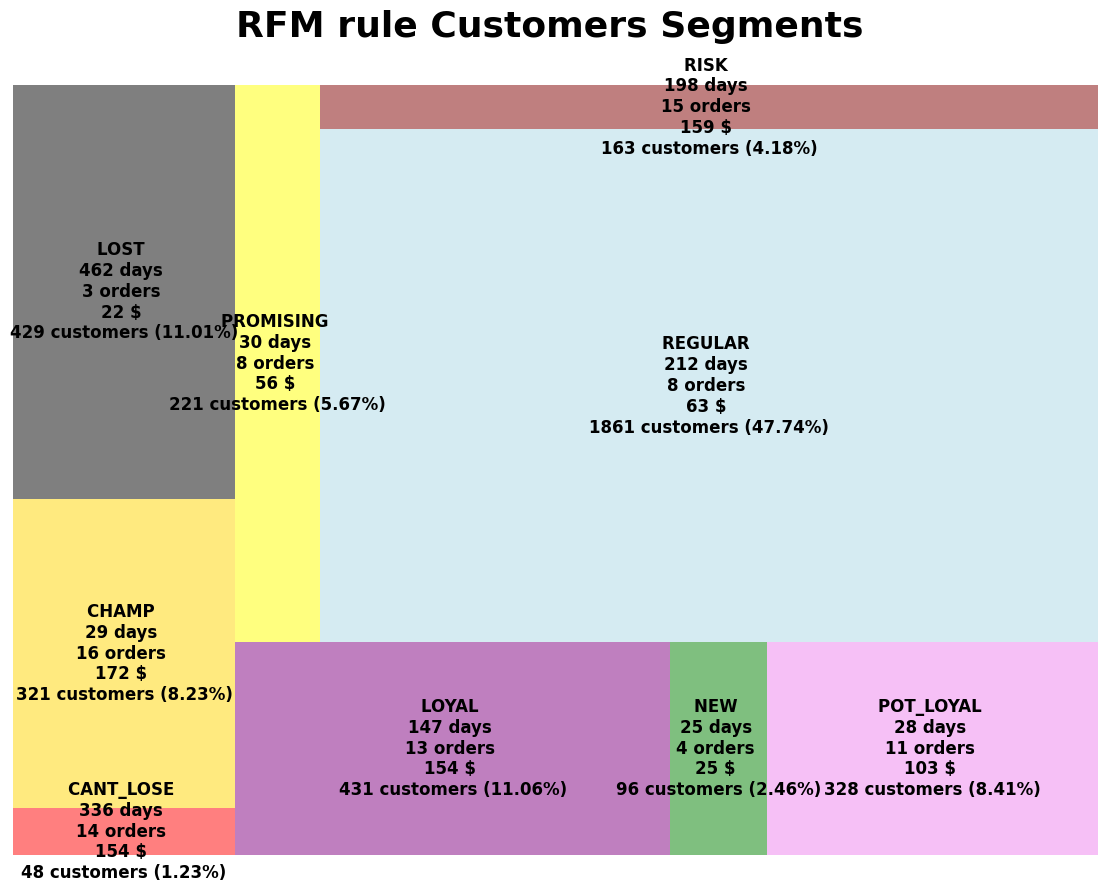

In [266]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 10)

colors_dict = {
    'CHAMP': 'gold',
    'LOYAL': 'purple',
    'POT_LOYAL': 'violet',
    'NEW': 'green',
    'PROMISING': 'yellow',
    'Need Attention': 'orange',
    
    'RISK': 'maroon',
    'CANT_LOSE': 'red',
  
    'LOST': 'black',
    'REGULAR': 'lightblue'
}

# Tạo danh sách màu theo thứ tự nhãn trong rfm_agg
colors = [colors_dict[label] for label in rfm_agg['RFM_Level']]

squarify.plot(sizes=rfm_agg['Count'],
              text_kwargs={'fontsize':12,'weight':'bold', 'fontname':"sans serif"},
              color=colors,
              label=['{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} customers ({}%)'.format(*rfm_agg.iloc[i])
                      for i in range(0, len(rfm_agg))], alpha=0.5 )


plt.title("RFM rule Customers Segments \n",fontsize=26,fontweight="bold")
plt.axis('off')

plt.savefig('RFM rule Segments.png')
plt.show()

#### Scatter Plot (RFM)

In [267]:
fig = px.scatter(rfm_agg, x="RecencyMean", y="MonetaryMean", size="FrequencyMean", color="RFM_Level",
           hover_name="RFM_Level", size_max=100, title="RFM Rule segments 2D Scatter plot")
for level, color in colors_dict.items():
    fig.update_traces(marker=dict(color=color), selector=dict(name=level))
fig.show()

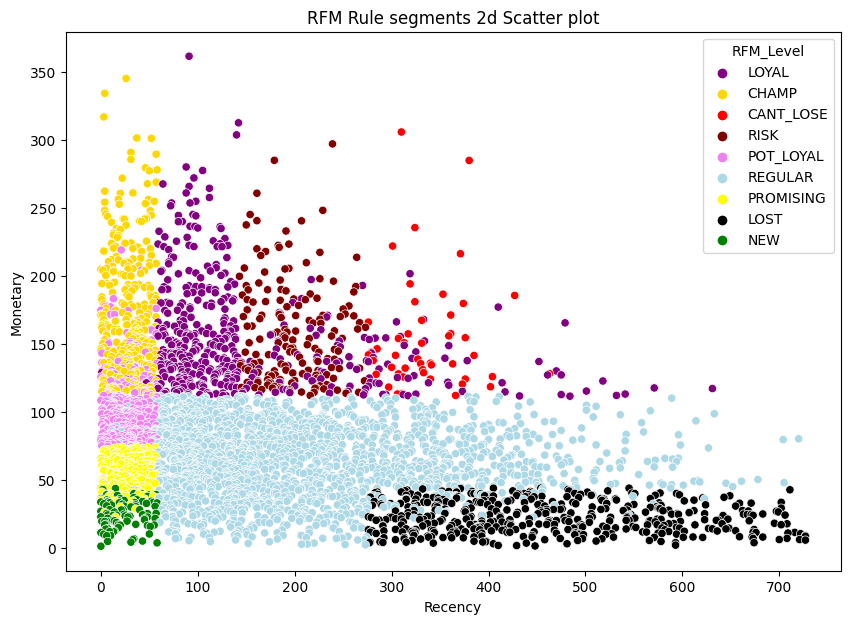

In [268]:
# Scatter plot
palette = [colors_dict[key] for key in df_RFM_rule['RFM_Level'].unique()]

plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_RFM_rule['Recency'], y=df_RFM_rule['Monetary'], hue=df_RFM_rule['RFM_Level'], palette=palette)
plt.title('RFM Rule segments 2d Scatter plot')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.savefig('RFM Rule scatter 2d.png')


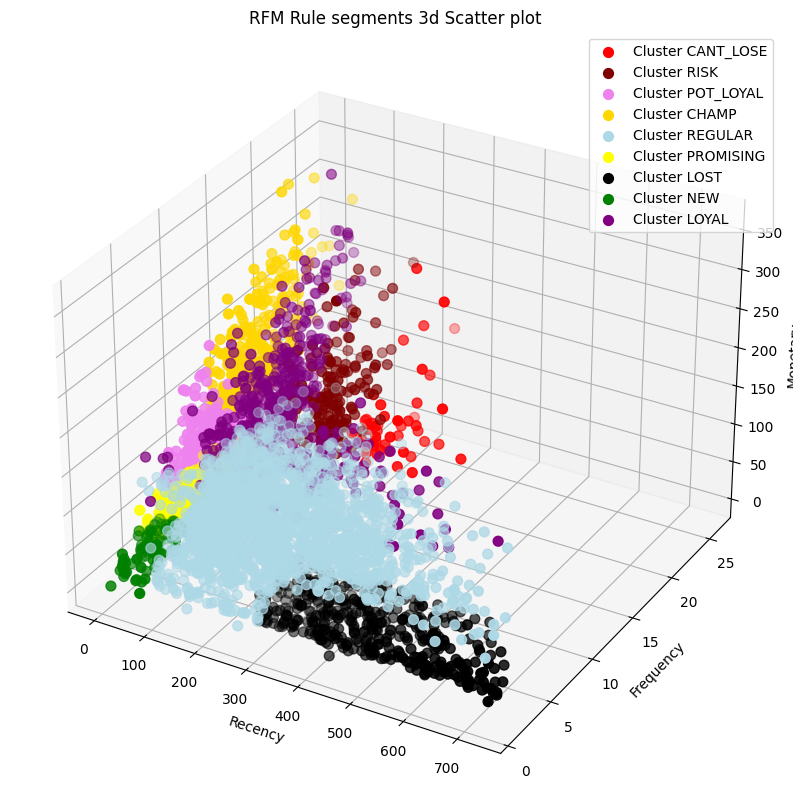

In [269]:
# Dữ liệu
x = df_RFM_rule['Recency']
y = df_RFM_rule['Frequency']
z = df_RFM_rule['Monetary']
cluster_labels = df_RFM_rule['RFM_Level']

# Tạo biểu đồ 3D Scatter plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Vẽ dữ liệu của từng cluster
for cluster in set(cluster_labels):
    ax.scatter(x[cluster_labels == cluster], y[cluster_labels == cluster], z[cluster_labels == cluster], label=f'Cluster {cluster}', s=50, color=colors_dict[cluster])

# Đặt nhãn cho trục
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# Thêm chú thích
ax.legend()
plt.title('RFM Rule segments 3d Scatter plot')

# Hiển thị biểu đồ
plt.savefig('RFM Rule scatter 3d.png')
plt.show()

In [270]:
fig = px.scatter_3d(df_RFM_rule, x='Recency', y='Frequency', z='Monetary',
                    color='RFM_Level', opacity = 0.7, title='RFM Rule  segments 3D Scatter plot')
for level, color in colors_dict.items():
    fig.update_traces(marker=dict(color=color), selector=dict(name=level))
fig.show()

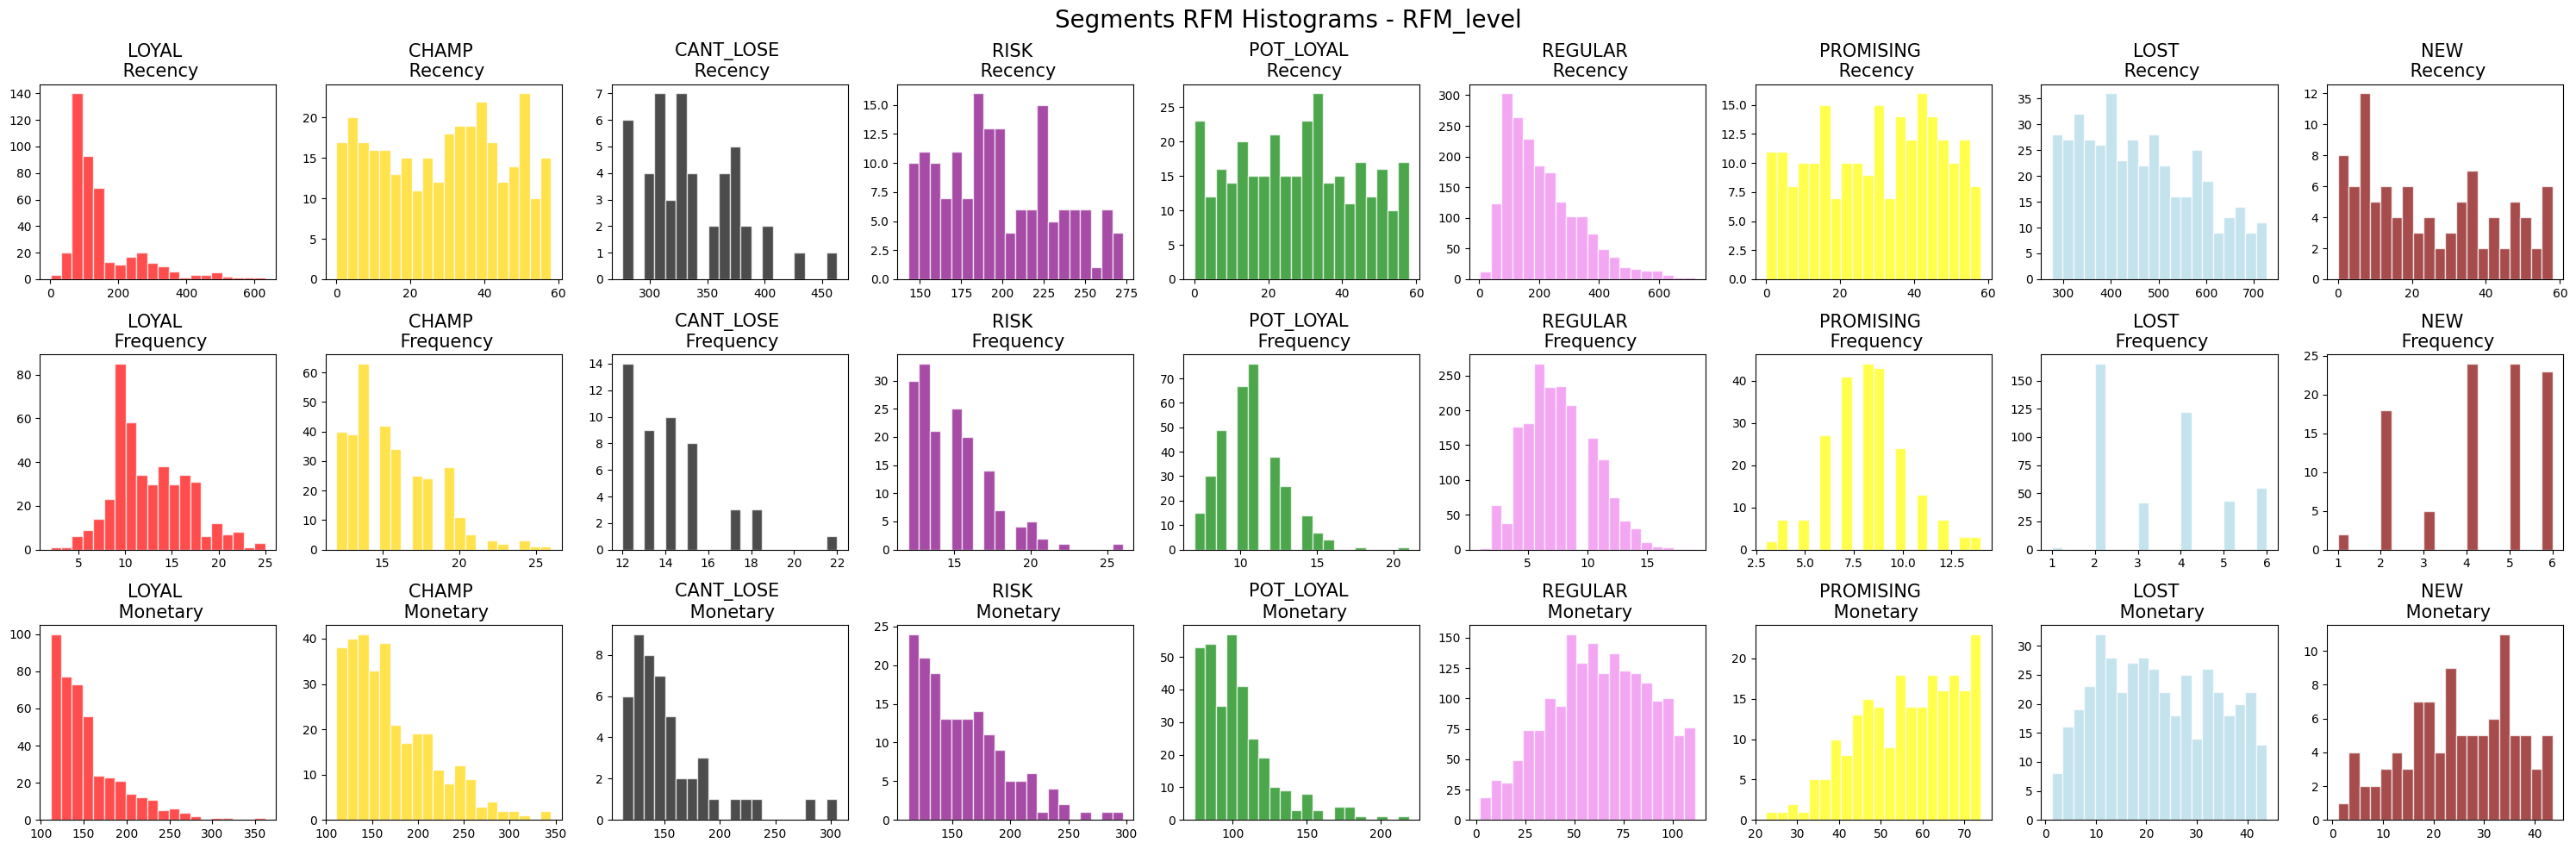

In [271]:
# Get unique clusters and features
clusters = df_RFM_rule['RFM_Level'].unique()
features = ['Recency', 'Frequency', 'Monetary']

# Set up subplots with a rectangular layout
fig, axes = plt.subplots(3, df_RFM_rule['RFM_Level'].nunique(), figsize=(30, 10))

# Loop through features and clusters
for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        # Select data for the current cluster and feature
        data = df_RFM_rule[df_RFM_rule['RFM_Level'] == cluster][feature]
        
        # Plot histogram for the current cluster and feature
        axes[i, j].hist(data, bins=20, color=colors[j], edgecolor='w', alpha=0.7)
        axes[i, j].set_title(f'{cluster} \n {feature}', fontsize=15)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')

# Add a title to the entire plot
plt.suptitle('Segments RFM Histograms - RFM_level', fontsize=20)

# Adjusting layout to prevent overlapping
plt.tight_layout()
plt.savefig('Histograms Segmented by RFM rule RFM_level.png')
plt.show()


Việc đưa ra chiến dịch quảng cáo, bán hàng và chăm sóc khách hàng phải được thiết kế phù hợp với từng nhóm khách hàng để tiết kiệm chi phí và đạt được hiệu quả tối đa. Dưới đây là những kiến nghị cụ thể cho mỗi nhóm:
#### Champions:
- Chiến dịch quảng cáo: Tạo ra các quảng cáo tập trung vào việc tạo ấn tượng sâu sắc về sự đa dạng và chất lượng sản phẩm, cũng như các ưu đãi độc quyền dành cho nhóm Champions.
- Chiến dịch bán hàng: Tạo ra các chương trình khuyến mãi đặc biệt như thẻ thành viên VIP, ưu đãi đặc biệt cho các sản phẩm cao cấp.
- Chăm sóc khách hàng: Dành thời gian và nguồn lực để xây dựng mối quan hệ cá nhân với khách hàng, cung cấp dịch vụ hậu mãi tốt nhất và ưu đãi độc quyền.
### Cannot Lose Them:
- Chiến dịch quảng cáo: Tạo ra các chiến dịch quảng cáo tập trung vào việc tạo ra sự nhận thức và tăng cường tương tác với nhóm khách hàng này. Sử dụng các kênh quảng cáo trực tuyến và offline để tiếp cận họ và tạo ra sự kích thích và hứng thú với sản phẩm và thương hiệu.
- Chiến dịch bán hàng: Phát triển các chương trình khuyến mãi và giải pháp sản phẩm đặc biệt nhằm thu hút sự quan tâm và khuyến khích họ tiếp tục mua hàng. Tạo ra các gói sản phẩm và ưu đãi đặc biệt để tạo ra giá trị cho nhóm khách hàng này và duy trì sự hài lòng của họ.
- Chăm sóc khách hàng: Cung cấp dịch vụ chăm sóc khách hàng cao cấp và cá nhân hóa để tạo ra một trải nghiệm mua sắm độc đáo và tuyệt vời cho nhóm khách hàng này. Sử dụng phản hồi khách hàng và các chương trình thành viên đặc biệt để xây dựng và duy trì mối quan hệ lâu dài với họ.
#### Loyal Customers:
- Chiến dịch quảng cáo: Tạo ra các quảng cáo nhắm vào việc tôn vinh và cảm ơn sự trung thành của khách hàng, đồng thời cung cấp các ưu đãi đặc biệt dành cho họ.
- Chiến dịch bán hàng: Phát triển chương trình khách hàng thân thiết để đảm bảo sự hài lòng và tiếp tục mua hàng của khách hàng.
- Chăm sóc khách hàng: Cung cấp dịch vụ hậu mãi chuyên nghiệp và cá nhân hóa để duy trì mối quan hệ tốt đẹp với khách hàng.
### Potential Loyalist:
- Chiến dịch quảng cáo: Tạo ra các chiến dịch quảng cáo nhằm tăng cường nhận thức về thương hiệu và sản phẩm, đồng thời cung cấp các ưu đãi hấp dẫn để khuyến khích khách hàng tiềm năng trở thành khách hàng trung thành.
- Chiến dịch bán hàng: Tạo ra các chương trình khuyến mãi đặc biệt và chương trình thưởng để khuyến khích khách hàng tiềm năng mua hàng và trải nghiệm dịch vụ của chúng tôi.
- Chăm sóc khách hàng: Tạo ra các chiến lược chăm sóc khách hàng cá nhân hóa để xây dựng mối quan hệ lâu dài và tăng cường độ kết nối với khách hàng.
### New Customers:
- Chiến dịch quảng cáo: Tạo ra các chiến dịch quảng cáo tập trung vào việc giới thiệu thương hiệu và sản phẩm của chúng tôi cho khách hàng mới, đồng thời cung cấp các ưu đãi đặc biệt cho họ.
- Chiến dịch bán hàng: Tạo ra các chương trình khuyến mãi dành riêng cho khách hàng mới để khuyến khích họ tham gia mua hàng và trải nghiệm dịch vụ của chúng tôi.
- Chăm sóc khách hàng: Cung cấp dịch vụ hỗ trợ và tư vấn chuyên nghiệp để giúp khách hàng mới hiểu rõ về sản phẩm và dịch vụ của chúng tôi, cũng như tạo ra một trải nghiệm mua hàng tích cực và đáng nhớ.

### Promising:
- Chiến dịch quảng cáo: Tạo ra các quảng cáo nhằm tăng cường nhận thức về thương hiệu và sản phẩm của chúng tôi đối với nhóm khách hàng này, đồng thời cung cấp các ưu đãi đặc biệt để khuyến khích họ tiếp tục mua hàng và trở thành khách hàng trung thành.
- Chiến dịch bán hàng: Phát triển các chương trình khuyến mãi hấp dẫn và các gói sản phẩm đặc biệt để kích thích mua sắm và tăng cường sự tham gia của nhóm khách hàng này.
- Chăm sóc khách hàng: Tạo ra các chiến lược chăm sóc khách hàng nhằm xây dựng mối quan hệ tốt đẹp và tăng cường sự hài lòng của khách hàng, đồng thời cung cấp hỗ trợ và tư vấn chuyên nghiệp.
### Need Attention:
- Chiến dịch quảng cáo: Tạo ra các chiến dịch quảng cáo nhằm cung cấp thông điệp phù hợp và giải pháp cho các vấn đề mà nhóm khách hàng này đang gặp phải, đồng thời cung cấp các ưu đãi và giải pháp để thu hút họ quay lại.
- Chiến dịch bán hàng: Phát triển các chương trình khuyến mãi và giải pháp đặc biệt nhằm giải quyết các vấn đề và nhu cầu cụ thể của nhóm khách hàng này, đồng thời tạo ra trải nghiệm mua hàng tích cực và thuận lợi.
- Chăm sóc khách hàng: Cung cấp dịch vụ hỗ trợ và tư vấn cá nhân hóa để giải quyết các vấn đề và nhu cầu của khách hàng, đồng thời xây dựng một mối quan hệ chặt chẽ và tin cậy.
### Lost:
- Chiến dịch quảng cáo: Tạo ra các chiến dịch quảng cáo chi phí thấp nhằm nhắc nhở nhóm khách hàng này về thương hiệu và sản phẩm của chúng tôi. Sử dụng email marketing và quảng cáo trên mạng xã hội để tiếp cận họ và tạo ra sự nhận thức về thương hiệu.
- Chiến dịch bán hàng: Phát triển các chương trình khuyến mãi và giải pháp sản phẩm đặc biệt nhằm thu hút sự quan tâm và khuyến khích họ quay lại mua hàng. Cung cấp các ưu đãi đặc biệt và dịch vụ hỗ trợ để tạo ra sự hứng thú và tiếp tục duy trì mối quan hệ.
- Chăm sóc khách hàng: Tạo ra các chiến lược chăm sóc khách hàng linh hoạt nhằm cung cấp hỗ trợ và tư vấn chuyên nghiệp cho nhóm khách hàng này. Cung cấp các dịch vụ hỗ trợ và giải đáp thắc mắc một cách nhanh chóng và hiệu quả để tạo ra một trải nghiệm tích cực và thu hút họ quay lại mua sắm.